# Content

[1. Setup](#Setup)

[2. Data Cleaning and Preparation](#Data-Cleaning-&-Preparation)

# Setup & Import¶

In [1459]:
#import basic system functions
import os
import datetime
from collections import Counter
import itertools
#import python_utils
import utils

#import libraries for data wrangling
import pandas as pd
import numpy as np

#import libraries for plotting data
import matplotlib.pyplot as plt
import matplotlib.pyplot as mplt

%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.plotting import autocorrelation_plot, lag_plot
from scipy import signal
# If you want a style choose one
#plt.style.use('Solarize_Light2')
#plt.style.use('tableau-colorblind10')
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'



#import libraries for time series analysis
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from pmdarima.arima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing

#import libraries for statistics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot


from IPython.display import Image
from datetime import datetime
import holidays

import warnings
warnings.filterwarnings('ignore')


In [1460]:
#df_new_1= pd.read_csv("df_new_1.csv")
df_new_2= pd.read_csv("df_new_2.csv")
df_2_clean= pd.read_csv("data_2_clean.csv")
#df_new_3= pd.read_csv("df_new_3.csv")

In [1461]:
#df_new_1.drop(columns=['Unnamed: 0'],inplace=True)
df_new_2.drop(columns=['Unnamed: 0'],inplace=True)
df_2_clean.drop(columns=['Unnamed: 0'],inplace=True)
#df_new_3.drop(columns=['Unnamed: 0'],inplace=True)

In [1750]:
df_2_dum['Mischbrot']=df_2_dum['Mischbrot'].apply(lambda x: x if x >0 else 0 )


## Convert to datetime

In [1462]:
#df_new_1['Datum'] = pd.to_datetime(df_new_1['Datum'])
df_new_2['Datum'] = pd.to_datetime(df_new_2['Datum'])
df_2_clean['Datum'] = pd.to_datetime(df_2_clean['Datum'])
#df_new_3['Datum'] = pd.to_datetime(df_new_3['Datum'])

## New Feature

In [1463]:
df_new_2['Gesamt_364'] =df_new_2['Gesamt'].shift(364)

In [ ]:
df_new_2['Gesamt_7'] =df_new_2['Gesamt'].shift(7)

In [1560]:
df_2_dum['Gesamt_7'] =df_2_dum['Gesamt'].shift(7)


### Christmas

In [1464]:
df_new_2['Christmas'] =df_new_2['Monat'].apply(lambda x: 1 if x in (10,11,12,1) else 0)

### New Years Eve

In [1465]:
def def_nye(Monat,Tag):
    ergebnis=0
    if Monat==12 and Tag==31:
        ergebnis=1
    else:
        ergebnis=0
    return ergebnis   

In [1466]:
liste=[df_new_2]

for i in liste:
   
   i['New_Years_Eve']=i.apply(lambda row: def_nye(row['Monat'],row['Tag']), axis=1)


### Summer Holidays

In [1467]:
summer_sh = pd.DataFrame({'date':pd.date_range('2019-12-23', '2020-01-06')})                  
summer_sh = summer_sh.append(pd.DataFrame({'date':pd.date_range('2019-07-01', '2019-08-08')}))                                   
summer_sh = summer_sh.append(pd.DataFrame({'date':pd.date_range('2018-07-09', '2018-08-17')}))               
summer_sh = summer_sh.append(pd.DataFrame({'date':pd.date_range('2017-07-24', '2017-09-02')}))               
summer_sh = summer_sh.append(pd.DataFrame({'date':pd.date_range('2016-07-25', '2016-09-02')}))               
summer_sh = summer_sh.append(pd.DataFrame({'date':pd.date_range('2015-07-20', '2015-08-29')}))                
summer_sh = summer_sh.sort_values('date') 
summer_sh['SUMMER_SH']=1

In [1474]:
df_new_2=pd.merge(df_new_2,summer_sh,left_on='Datum',right_on='date',how='left').fillna(0)

In [1475]:
df_new_2.drop(columns=['date'],inplace=True)

In [1476]:
df_2_dum=pd.merge(df_2_dum,summer_sh,left_on='Datum',right_on='date',how='left').fillna(0)

In [1477]:
df_2_dum.drop(columns=['date'],inplace=True)

## Modifiying categorical features

In [1468]:
month_dummy= pd.get_dummies(df_new_2['Monat'], prefix='M', drop_first=True)


In [1469]:
weekday_dummy= pd.get_dummies(df_new_2['Wochentag'], prefix='W', drop_first=True)

In [1470]:
year_dummy= pd.get_dummies(df_new_2['Jahr'], prefix='J', drop_first=True)

In [1471]:
season_dummy=pd.get_dummies(df_new_2['Season'], prefix='S', drop_first=True)

In [1472]:
df_2_dum = df_new_2.drop(['Monat','Wochentag','Jahr','Season'], axis=1) 

In [1473]:
df_2_dum = pd.concat([df_2_dum,month_dummy,weekday_dummy,year_dummy,season_dummy], axis=1) 


In [1478]:
df_2_dum.columns

Index(['Datum', 'Weizenbrot', 'Mischbrot', 'Vollkornbrot', 'Stangenbrote',
       'Spezialbrot', 'Brötchen', 'Süsse_Brötchen', 'Herzhafte_Brötchen',
       'KonditoreiBlech', 'Stückgebäck', 'Blechkuchen', 'Weihnachtsartikel',
       'Tag', 'Gesamt', 'Wochenende_flag', 'Closed', 'Outlier', 'Feiertag_DE',
       'Holidays_SH', 'Kieler_Woche', 'Niederschlag', 'Sonne_h',
       'Temperatur_max', 'Gesamt_364', 'Christmas', 'New_Years_Eve', 'M_2',
       'M_3', 'M_4', 'M_5', 'M_6', 'M_7', 'M_8', 'M_9', 'M_10', 'M_11', 'M_12',
       'W_1', 'W_2', 'W_3', 'W_4', 'W_5', 'W_6', 'J_2016', 'J_2017', 'J_2018',
       'J_2019', 'J_2020', 'S_2', 'S_3', 'S_4', 'SUMMER_SH'],
      dtype='object')

## Distribution

In [11]:
# Valuation of agg.Values
df_new_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Weizenbrot,1979.0,63.447962,29.216742,0.0,60.117258,71.638075,81.295926,120.423144
Mischbrot,1979.0,71.860719,20.052765,0.0,60.991450,73.463033,84.206328,152.746146
Vollkornbrot,1979.0,108.283982,26.926271,0.0,95.047923,108.428509,123.201725,225.035588
Stangenbrote,1979.0,39.816439,17.646559,0.0,30.038129,39.332197,49.454939,198.752191
Spezialbrot,1979.0,56.310284,26.874605,0.0,51.758903,61.850288,71.343340,200.259200
Brötchen,1979.0,375.431206,138.927415,0.0,273.886926,355.500769,462.666723,820.516093
Süsse_Brötchen,1979.0,196.670399,57.579214,0.0,161.334074,185.408152,228.537989,428.071519
Herzhafte_Brötchen,1979.0,93.947422,36.940020,0.0,70.681393,87.759013,111.181716,268.706655
KonditoreiBlech,1979.0,98.692646,64.111577,0.0,54.576132,73.102484,150.262028,399.988543
Stückgebäck,1979.0,152.085738,89.090462,0.0,121.227612,145.715536,172.554556,1798.588913


## Correlations

<function matplotlib.pyplot.show(close=None, block=None)>

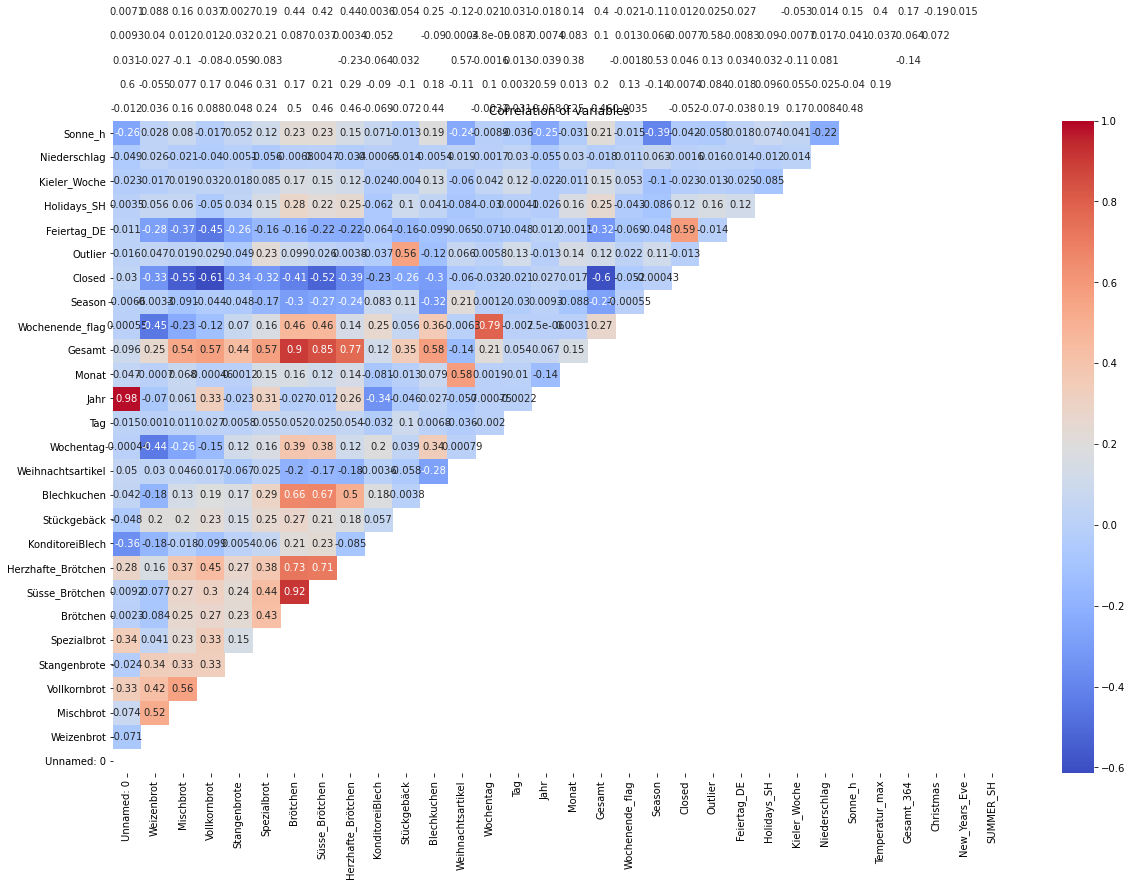

In [1385]:
#First we create a new DataFrame with only numerical features
numerics = ['int64', 'float64']

num_df = df_new_2.select_dtypes(include=numerics)

#Korrelationsanalyse
mask = np.triu( num_df.corr())
plt.figure(figsize=(20,12))
plt.title('Correlation of variables')
ax=sns.heatmap(num_df.corr(),vmax=1.0,annot=True,mask=mask,cmap='coolwarm')
plt.savefig('correlogram_simple.png')
ax.set_ylim((0,27))
plt.show

# Checks Timeseries & Setup Modelling


In [1751]:
df_newmodel_2 = df_new_2.copy().set_index('Datum')
df_newmodel_2_dum = df_2_dum.copy().set_index('Datum')


In [ ]:
#df_new_1_index=df_newmodel_1.set_index('Datum')
#df_new_2_index=df_newmodel_2.set_index('Datum')
#df_new_3_index=df_newmodel_1.set_index('Datum')

## Metrics

**Conclusions**
- `I choose MAE and MAPE as Performance Measures for my project.`

I would analyse the results from the different models via the two different metrics mean absolute error **MAE** which is available via Sklearn.metrics and via the metrics mean absolute percentage error called **MAPE**.

There is no inbuilt function in sci-kit learn, so i define a custom function to calculate this measure. I adjusted the commom measure in the way that i do not consider all closed days of a Filiale.


In [35]:
#calculate mean absolute forecast error which only take actual values unequal to zero in consideration
def mean_absolute_percentage_error_WZ(actual, predicted): 
    
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100


In [1927]:
#calculate mean absolute percentage forecast error
def mean_absolute_percentage_error(actual, predicted): 
    
    nz_1=(actual==0)
    actual_nz=actual[nz_1==0]
    
    difference_nz=actual-predicted
    difference_nz.dropna()
    return np.mean(np.abs((difference_nz) / actual_nz)) * 100

In [1935]:
def mean_absolute_percentage_error_series(actual, predicted): 
    actual= pd.Series(actual)
    predicted= pd.Series(predicted)
    
    nz_1=(actual==0)
    actual_nz=actual[nz_1==0]
    
    difference_nz=actual-predicted
    difference_nz.dropna()
    return np.mean(np.abs((difference_nz) / actual_nz)) * 100

## Test-/Train-Split

Split into train and test datasets to build the model on the training dataset and forecast using the test dataset. I decide to use the first 4 years for training and the period since 01.01.2019 for testing. 

In [1480]:
# use past 4 years data to forecast the next 15 months until corona

start_train='01.01.2016'
end_train = '31.12.2018'
start_test='01.01.2019'
corona='15.03.2020'
ende='31.05.2020'

In [1481]:
start_short='01.01.2018'
end_short = '31.12.2019'
start_test_short='01.01.2020'

In [1753]:
# Basismodel
train_basis_2 = df_newmodel_2[:end_train].copy()
test_basis_2 = df_newmodel_2[end_train:corona].copy()

In [1483]:
train_new_2 = df_newmodel_2[start_train:end_train].copy()
test_new_2 = df_newmodel_2[start_test:corona].copy()


In [1752]:
train_dum_2 = df_newmodel_2_dum[start_train:end_train].copy()
test_dum_2 = df_newmodel_2_dum[start_test:corona].copy()

In [1409]:
train_short_2 = df_newmodel_2[start_short:end_short]
test_short_2 = df_newmodel_2[start_test_short:corona]


## Baseline Model

In [1938]:
#article_selection 
article_selection=df_newmodel_2.iloc[:,0:12].columns.tolist()
     

### Simple Baseline Shift 7

In [1968]:
df_results_Baseline_shift = pd.DataFrame( 
                  columns=['Model', 'Label','MAE_BASELINE','MAPE_BASELINE'])

In [1969]:
# Baseline als moving average via window=7
for X in  article_selection:  
    MAE=(mean_absolute_error(df_new_2[X], df_new_2[X].shift(7).fillna(0)))
    MAPE=(mean_absolute_percentage_error(df_new_2[X], df_new_2[X].shift(7).fillna(0)))
    df_results_Baseline_shift=df_results_Baseline_shift.append({'Model' :
                          'BASELINE-SHIFT' , 'Label' : X, 'MAE_BASELINE' : MAE,'MAPE_BASELINE' : MAPE} , ignore_index=True)

In [1970]:
df_results_Baseline_shift

,Model,Label,MAE_BASELINE,MAPE_BASELINE
0,BASELINE-SHIFT,Weizenbrot,15.933675,21.990651
1,BASELINE-SHIFT,Mischbrot,17.654305,23.645570
2,BASELINE-SHIFT,Vollkornbrot,22.239644,18.866356
3,BASELINE-SHIFT,Stangenbrote,16.366801,49.855707
4,BASELINE-SHIFT,Spezialbrot,18.415565,26.599027
5,BASELINE-SHIFT,Brötchen,69.431490,16.911998
6,BASELINE-SHIFT,Süsse_Brötchen,29.227411,13.062030
7,BASELINE-SHIFT,Herzhafte_Brötchen,23.752415,24.828228
8,BASELINE-SHIFT,KonditoreiBlech,35.967063,42.107328
9,BASELINE-SHIFT,Stückgebäck,46.763597,27.807253


In [1971]:
df_results_Baseline_shift.to_csv("df_results_Baseline_shift")

### Advanced Baseline - Moving Average

The moving average value can also be used directly to make predictions as a naive model and baseline for further 
on analysis. The fit would has been better if trend and seasonality components of the time series have already been removed or adjusted for.

In [1957]:
df_results_Baseline_adv = pd.DataFrame( 
                  columns=['Model', 'Label','MAE_BASELINE','MAPE_BASELINE'])

In [1960]:
df_results_Baseline_adv.to_csv("df_results_Baseline_adv")

In [1959]:
df_results_Baseline_adv

,Model,Label,MAE_BASELINE,MAPE_BASELINE
0,BASELINE,Weizenbrot,21.810966,18.654254
1,BASELINE,Mischbrot,14.696344,19.716579
2,BASELINE,Vollkornbrot,17.744443,14.401461
3,BASELINE,Stangenbrote,13.188681,40.556283
4,BASELINE,Spezialbrot,16.508831,20.319135
5,BASELINE,Brötchen,77.563061,18.530199
6,BASELINE,Süsse_Brötchen,32.109803,13.787416
7,BASELINE,Herzhafte_Brötchen,18.289108,18.341505
8,BASELINE,KonditoreiBlech,34.783809,39.552476
9,BASELINE,Stückgebäck,36.841229,20.410318


In [1958]:
# Baseline als moving average via window=7
for X in  article_selection:   

    window = 7
    history = [df_new_2[X][i] for i in range(window)]  
    test = [df_new_2[X][i] for i in range(window, len(df_newmodel_2[X]))] 
    predictions = []
#walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)]) 
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
    MAE=(mean_absolute_error(test, predictions))
    MAPE=(mean_absolute_percentage_error_series(test, predictions))
    df_results_Baseline_adv=df_results_Baseline_adv.append({'Model' :
                          'BASELINE' , 'Label' : X, 'MAE_BASELINE' : MAE,'MAPE_BASELINE' : MAPE} , ignore_index=True)

In [1925]:
X_6=df_new_2.Brötchen   
window = 7
history_6 = [X_6[i] for i in range(window)]  
test_6 = [X_6[i] for i in range(window, len(X_6))] 
predictions_6 = []
#walk forward over time steps in test
for t in range(len(test_6)):
      length = len(history_6)
      yhat = mean([history_6[i] for i in range(length-window,length)]) 
      obs = test_6[t]
      predictions_6.append(yhat)
      history_6.append(obs)
        

In [1955]:
mae_6=(mean_absolute_error(df_new_2.Brötchen, df_new_2.Brötchen.shift(7).fillna(0)))
mae_6

69.4314903268251

In [1956]:
mape_6=(mean_absolute_percentage_error(df_new_2.Brötchen, df_new_2.Brötchen.shift(7).fillna(0)))
mape_6

16.91199845574783

Ergebnis der Baseline for articlegroup Brötchen:
Mean absolute Error MAE 77.563
Mean absolute percentage Error MAPE 18.530


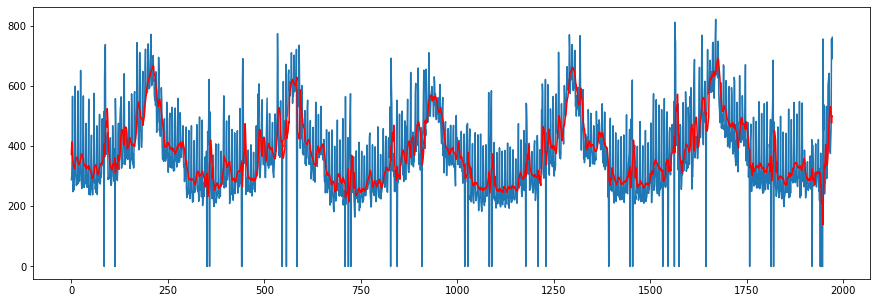

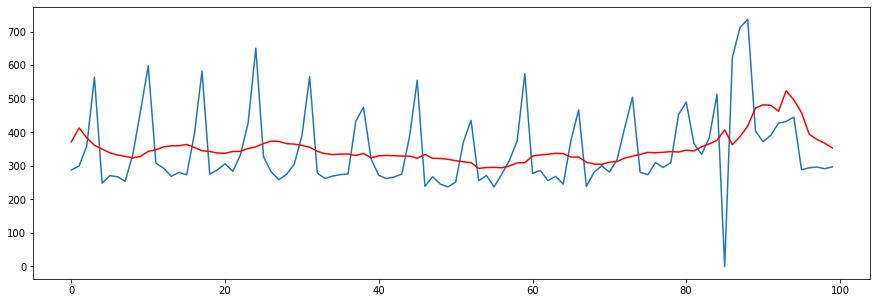

In [1936]:
mae_6=(mean_absolute_error(test_6, predictions_6))
mape_6=(mean_absolute_percentage_error_series(test_6, predictions_6))
print('Ergebnis der Baseline for articlegroup Brötchen:')
print('Mean absolute Error MAE %.3f' % mae_6)
print('Mean absolute percentage Error MAPE %.3f' % mape_6)
# plot
plt.figure(figsize=(15,5))
pyplot.plot(test_6)
pyplot.plot(predictions_6, color='red') 
pyplot.show()
# zoom plot
plt.figure(figsize=(15,5))
pyplot.plot(test_6[:100]) 
pyplot.plot(predictions_6[:100], color='red') 
pyplot.show()

# SARIMA und SARIMAX

## SARIMA - Basismodell

### SARIMA Model

#### Summary of the results (MAE,MAPE)

In [59]:
df_results_Sarima = pd.DataFrame( 
                  columns=['Model', 'Label','MAE','MAPE'])

In [1094]:
df_results_Sarima

,Model,Label,MAE,MAPE
6,SARIMA-BASIS,Brötchen,104.354,23.8067
11,SARIMA-BASIS,Blechkuchen,34.6191,36.892
1,SARIMA-BASIS,Weizenbrot,19.615,31.226
2,SARIMA-BASIS,Mischbrot,16.2121,20.5987
3,SARIMA-BASIS,Vollkornbrot,21.792,15.3152
4,SARIMA-BASIS,Spezialbrot,12.2237,18.4737
5,SARIMA-BASIS,Stangenbrote,11.8605,35.2383
7,SARIMA-BASIS,Süsse_Brötchen,36.166,15.3597
8,SARIMA-BASIS,Herzhafte_Brötchen,31.69,23.9268
9,SARIMA-BASIS,KonditoreiBlech,19.6212,24.2151


In [ ]:
df_results_Sarima.to_csv("df_results_Sarima")

#### Tuning Hyperparameter

In [1093]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(train_basis_2['Weizenbrot'], 
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=7, max_q=7, m=7,
                           start_P=0, seasonal=True,
                            D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

#sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=13371.074, Time=0.42 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=13077.697, Time=0.70 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=13369.081, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=13365.698, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=12980.964, Time=0.93 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=12980.891, Time=0.78 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=13078.715, Time=0.24 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=12981.113, Time=1.04 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=12982.495, Ti

#### Weizenbrot

In [925]:
# Model fit
sarima_basis_2_1 = sm.tsa.statespace.SARIMAX(train_basis_2['Weizenbrot'],order=(2,0,0),seasonal_order=((2, 1, 0, 7)),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()

In [926]:

pred_basis_2_1 = sarima_basis_2_1.predict('01.01.2019','15.03.2020')[:]
MAE_1=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Weizenbrot'],pred_basis_2_1))
MAPE_1=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Weizenbrot'],pred_basis_2_1))
print('Results for Basismodel-Articlegroup Weizenbrot:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_1))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_1))

Results for Basismodel-Articlegroup Weizenbrot:
SARIMA model MAE: 19.62
SARIMA model MAPE: 31.23%


In [927]:
df_results_Sarima.loc['1',:] = ['SARIMA-BASIS','Weizenbrot',MAE_1,MAPE_1]

#### Mischbrot

In [1754]:
# Model fit
sarima_basis_2_2 = sm.tsa.statespace.SARIMAX(train_basis_2['Mischbrot'],order=(0,1,1),seasonal_order=((0, 0,1, 7)),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()

In [1755]:
pred_basis_2_2 = sarima_basis_2_2.predict('01.01.2019','15.03.2020')[:]

MAE_2=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Mischbrot'],pred_basis_2_2))
MAPE_2=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Mischbrot'],pred_basis_2_2))
print('Results for Basismodel-Articlegroup Mischbrot:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_2))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_2))

df_results_Sarima.loc['2',:] = ['SARIMA-BASIS','Mischbrot',MAE_2,MAPE_2]

Results for Basismodel-Articlegroup Mischbrot:
SARIMA model MAE: 16.21
SARIMA model MAPE: 20.60%


#### Vollkornbrot

In [933]:
# Model fit
sarima_basis_2_3 = sm.tsa.statespace.SARIMAX(train_basis_2['Vollkornbrot'],
                                             order=(0,1,1),seasonal_order=((0, 0, 1, 7)),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()

In [934]:
pred_basis_2_3 = sarima_basis_2_3.predict('01.01.2019','15.03.2020')[:]

MAE_3=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Vollkornbrot'],pred_basis_2_3))
MAPE_3=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Vollkornbrot'],pred_basis_2_3))
print('Results for Basismodel-Articlegroup Vollkornbrot:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_3))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_3))

df_results_Sarima.loc['3',:] = ['SARIMA-BASIS','Vollkornbrot',MAE_3,MAPE_3]

Results for Basismodel-Articlegroup Vollkornbrot:
SARIMA model MAE: 21.79
SARIMA model MAPE: 15.32%


#### Spezialbrot

In [936]:
# Model fit
sarima_basis_2_4 = sm.tsa.statespace.SARIMAX(train_basis_2['Spezialbrot'],order=(5,1,5),
                                             #seasonal_order=((2, 0, 1, 7)),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()

In [937]:
pred_basis_2_4 = sarima_basis_2_4.predict('01.01.2019','15.03.2020')[:]

MAE_4=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Spezialbrot'],pred_basis_2_4))
MAPE_4=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Spezialbrot'],pred_basis_2_4))
print('Results for Basismodel-Articlegroup Spezialbrot:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_4))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_4))

df_results_Sarima.loc['4',:] = ['SARIMA-BASIS','Spezialbrot',MAE_4,MAPE_4]

Results for Basismodel-Articlegroup Spezialbrot:
SARIMA model MAE: 12.22
SARIMA model MAPE: 18.47%


#### Stangenbrote

In [942]:
# Model fit
sarima_basis_2_5 = sm.tsa.statespace.SARIMAX(train_basis_2['Stangenbrote'],order=(1,0,0)
                                             ,seasonal_order=((1, 0, 1, 7)),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()

In [943]:
pred_basis_2_5= sarima_basis_2_5.predict('01.01.2019','15.03.2020')[:]

MAE_5=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Stangenbrote'],pred_basis_2_5))
MAPE_5=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Stangenbrote'],pred_basis_2_5))
print('Results for Basismodel-Articlegroup Stangenbrote:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_5))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_5))

df_results_Sarima.loc['5',:] = ['SARIMA-BASIS','Stangenbrote',MAE_5,MAPE_5]

Results for Basismodel-Articlegroup Stangenbrote:
SARIMA model MAE: 11.86
SARIMA model MAPE: 35.24%


#### Brötchen

In [958]:
# Model fit
sarima_basis_2_6 = sm.tsa.statespace.SARIMAX(train_basis_2['Brötchen'],order=(1,0,6),seasonal_order=(0,1,2,7),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarima_basis_2_6.summary()

In [959]:
pred_basis_2_6 = sarima_basis_2_6.predict('01.01.2019','15.03.2020')[:]

MAE_6=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Brötchen'],pred_basis_2_6))
MAPE_6=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Brötchen'],pred_basis_2_6))
print('Results for Basismodel-Articlegroup Brötchen:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_6))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_6))

df_results_Sarima.loc['6',:] = ['SARIMA-BASIS','Brötchen',MAE_6,MAPE_6]

Results for Basismodel-Articlegroup Brötchen:
SARIMA model MAE: 104.35
SARIMA model MAPE: 23.81%


#### Süsse_Brötchen

In [965]:
# Model fit
sarima_basis_2_7 = sm.tsa.statespace.SARIMAX(train_basis_2['Süsse_Brötchen'],order=(3,0,0),seasonal_order=(2,0,1,7),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarima_basis_2_7.summary()

In [966]:
pred_basis_2_7 = sarima_basis_2_7.predict('01.01.2019','15.03.2020')[:]

MAE_7=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],pred_basis_2_7))
MAPE_7=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],pred_basis_2_7))
print('Results for Basismodel-Articlegroup Süsse_Brötchen:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_7))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_7))

df_results_Sarima.loc['7',:] = ['SARIMA-BASIS','Süsse_Brötchen',MAE_7,MAPE_7]

Results for Basismodel-Articlegroup Süsse_Brötchen:
SARIMA model MAE: 36.17
SARIMA model MAPE: 15.36%


#### Herzhafte Brötchen

In [970]:
# Model fit
sarima_basis_2_8 = sm.tsa.statespace.SARIMAX(train_basis_2['Herzhafte_Brötchen'],order=(0,0,5),seasonal_order=(2,1,2,7),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarima_basis_2_8.summary()

In [971]:
pred_basis_2_8 = sarima_basis_2_8.predict('01.01.2019','15.03.2020')[:]

MAE_8=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],pred_basis_2_8))
MAPE_8=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],pred_basis_2_8))
print('Results for Basismodel-Articlegroup Herzhafte_Brötchen:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_8))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_8))

df_results_Sarima.loc['8',:] = ['SARIMA-BASIS','Herzhafte_Brötchen',MAE_8,MAPE_8]

Results for Basismodel-Articlegroup Herzhafte_Brötchen:
SARIMA model MAE: 31.69
SARIMA model MAPE: 23.93%


#### KonditoreiBlech

In [975]:
# Model fit
sarima_basis_2_9 = sm.tsa.statespace.SARIMAX(train_basis_2['KonditoreiBlech'],
                                             order=(2,0,1),seasonal_order=(0,1,2,7),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarima_basis_2_9.summary()

In [976]:
pred_basis_2_9 = sarima_basis_2_9.predict('01.01.2019','15.03.2020')[:]

MAE_9=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['KonditoreiBlech'],pred_basis_2_9))
MAPE_9=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['KonditoreiBlech'],pred_basis_2_9))
print('Results for Basismodel-Articlegroup KonditoreiBlech:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_9))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_9))

df_results_Sarima.loc['9',:] = ['SARIMA-BASIS','KonditoreiBlech',MAE_9,MAPE_9]

Results for Basismodel-Articlegroup KonditoreiBlech:
SARIMA model MAE: 19.62
SARIMA model MAPE: 24.22%


#### Stückgebäck

In [978]:
# Model fit
sarima_basis_2_10 = sm.tsa.statespace.SARIMAX(train_basis_2['Stückgebäck'],order=(2,0,1),seasonal_order=(0,1,2,7),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarima_basis_2_10.summary()

In [979]:
pred_basis_2_10 = sarima_basis_2_10.predict('01.01.2019','15.03.2020')[:]

MAE_10=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Stückgebäck'],pred_basis_2_10))
MAPE_10=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Stückgebäck'],pred_basis_2_10))
print('Results for Basismodel-Articlegroup Stückgebäck:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_10))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_10))

df_results_Sarima.loc['10',:] = ['SARIMA-BASIS','Stückgebäck',MAE_10,MAPE_10]

Results for Basismodel-Articlegroup Stückgebäck:
SARIMA model MAE: 39.67
SARIMA model MAPE: 23.26%


#### Blechkuchen

In [989]:
# Model fit
sarima_basis_2_11 = sm.tsa.statespace.SARIMAX(train_basis_2['Blechkuchen'],order=(1,0,1),seasonal_order=(0,1,2,7),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarima_basis_2_10.summary()

In [990]:
pred_basis_2_11 = sarima_basis_2_11.predict('01.01.2019','15.03.2020')[:]

In [991]:
MAE_11=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Blechkuchen'],pred_basis_2_11))
MAPE_11=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Blechkuchen'],pred_basis_2_11))
print('Results for Basismodel-Articlegroup Blechkuchen:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_11))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_11))

df_results_Sarima.loc['11',:] = ['SARIMA-BASIS','Blechkuchen',MAE_11,MAPE_11]

Results for Basismodel-Articlegroup Blechkuchen:
SARIMA model MAE: 34.62
SARIMA model MAPE: 36.89%


#### Weihnachtsartikel

In [ ]:
#model_autoarima_12.summary()

In [1013]:
# Model fit
sarima_basis_2_12 = sm.tsa.statespace.SARIMAX(train_basis_2['Weihnachtsartikel'],order=(2,0,2),
                                              #seasonal_order=(2,0,1,7),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarima_basis_2_13.summary()

In [1014]:
pred_basis_2_12 = sarima_basis_2_12.predict('01.01.2019','15.03.2020')[:]

MAE_12=(mean_absolute_error(test_basis_2['01.01.2019':'15.03.2020']['Weihnachtsartikel'],pred_basis_2_12))
MAPE_12=(mean_absolute_percentage_error(test_basis_2['01.01.2019':'15.03.2020']['Weihnachtsartikel'],pred_basis_2_12))
print('Results for Basismodel-Articlegroup Weihnachtsartikel:')
print('SARIMA model MAE: {0:.2f}'.format(MAE_12))
print('SARIMA model MAPE: {0:.2f}%'.format(MAPE_12))

df_results_Sarima.loc['12',:] = ['SARIMA-BASIS','Weihnachtsartikel',MAE_12,MAPE_12]

Results for Basismodel-Articlegroup Weihnachtsartikel:
SARIMA model MAE: 21.48
SARIMA model MAPE: 99.90%


### Diagnostics for Brötchen

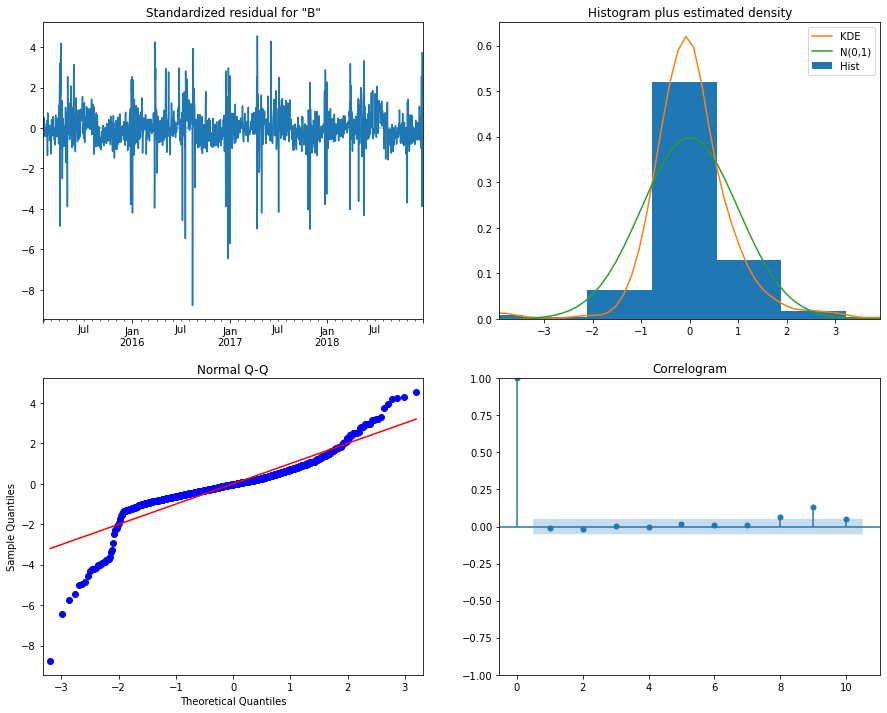

In [1016]:
sarima_basis_2_6.plot_diagnostics(figsize=(15, 12))
plt.show()

## SARIMAX - New Model

### SARIMAX Model with exogenen Faktoren

In [1920]:
exog_train_dum_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2016-01-01 to 2018-12-31
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wochenende_flag  1096 non-null   int64  
 1   Closed           1096 non-null   int64  
 2   Outlier          1096 non-null   int64  
 3   Feiertag_DE      1096 non-null   int64  
 4   Holidays_SH      1096 non-null   float64
 5   Kieler_Woche     1096 non-null   int64  
 6   Niederschlag     1096 non-null   float64
 7   Sonne_h          1096 non-null   float64
 8   Temperatur_max   1096 non-null   float64
 9   Gesamt_364       1096 non-null   float64
 10  Christmas        1096 non-null   int64  
 11  New_Years_Eve    1096 non-null   int64  
 12  M_2              1096 non-null   uint8  
 13  M_3              1096 non-null   uint8  
 14  M_4              1096 non-null   uint8  
 15  M_5              1096 non-null   uint8  
 16  M_6              1096 non-null   uint8  
 

In [1564]:
exog_train_dum_2=train_dum_2.iloc[:,np.r_[14:52,13,52]].copy()
exog_test_dum_2=test_dum_2.iloc[:,np.r_[14:52,13,52]].copy()

exog_train_dum_2_short=train_dum_2.iloc[:,np.r_[14:20,22:26,27:52]].copy()
exog_test_dum_2_short=test_dum_2.iloc[:,np.r_[14:20,22:26,27:52]].copy()

#exog_christmas_train=train_new_2.iloc[:,np.r_[12,14,17:29]]
#exog_christmas_test=test_new_2.iloc[:,np.r_[12,14,17:29]]

#### Summary of the results (MAE, MAPE)

In [399]:
df_results_Sarimax = pd.DataFrame( 
                  columns=['Model', 'Label','MAE_NEW','MAPE_NEW'])

In [769]:
df_results_Sarimax

,Model,Label,MAE_NEW,MAPE_NEW
1,SARIMA-BASIS,Weizenbrot,10.6651,15.4602
2,SARIMA-BASIS,Mischbrot,13.7405,18.7886
3,SARIMA-BASIS,Vollkornbrot,15.3845,12.7915
4,SARIMA-BASIS,Spezialbrot,13.9646,23.6154
5,SARIMA-BASIS,Stangenbrote,12.4751,43.6998
6,SARIMA-BASIS,Brötchen,32.1666,8.78896
7,SARIMA-BASIS,SüsseBrötchen,19.3773,8.74359
8,SARIMA-BASIS,Herzhafte_Brötchen,19.3537,18.5574
9,SARIMA-BASIS,KonditoreiBlech,18.6119,24.993
10,SARIMA-BASIS,Stückgebäck,32.172,22.7699


In [ ]:
df_results_Sarima= pd.read_csv("df_results_Sarima")

In [ ]:
df_vergleich=pd.merge(df_results_Sarimax,df_results_Sarima)
df_vergleich

In [770]:
df_results_Sarimax.to_csv("df_results_Sarimax")

#### Summary of the results (MAE, MAPE)

In [806]:
df_results_Sarimax_CF = pd.DataFrame( 
                  columns=['Model', 'Label','MAE_NEW','MAPE_NEW'])

In [1745]:
df_results_Sarimax_CF

,Model,Label,MAE_NEW,MAPE_NEW
1,SARIMAX-CF,Weizenbrot,11.148,16.806
2,SARIMAX-CT,Mischbrot,15.2239,19.7283
3,SARIMAX-CF,Vollkornbrot,16.3308,12.8523
13,SARIMAX-CF-GESPRED,Brötchen,27.1474,6.68927
4,SARIMAX-CF,Spezialbrot,11.8215,17.4811
5,SARIMAX-CF,Stangenbrote,14.3577,37.6206
6,SARIMAX-CF,Brötchen,60.9805,13.6572
7,SARIMAX-CF,SüsseBrötchen,27.9107,12.4032
8,SARIMAX-CF,Herzhafte_Brötchen,21.1181,17.9284
9,SARIMAX-CF,KonditoreiBlech,19.3935,24.5863


In [770]:
df_results_Sarimax_CF.to_csv("df_results_Sarimax_CF")

### Tuning Hyperparameter

In [ ]:
 exogenous=exog_train_dum_2,

In [1349]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(train_basis_2['Stangenbrote'], 
                           start_p=0, start_q=0,exog=exog_train_dum_2.iloc[:,np.r_[0,12:29]],
                           test='adf',
                           max_p=7, max_q=7, m=1,
                           start_P=0, seasonal=True,
                            D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

#sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=13135.350, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=12728.373, Time=0.63 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=13133.356, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=13137.294, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=12623.160, Time=1.28 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=12624.769, Time=0.78 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=12621.914, Time=1.58 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=12729.181, Time=0.59 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=12621.590, Ti

#### Weizenbrot

In [1334]:
# Model fit
sarimax_new_2_1 = sm.tsa.statespace.SARIMAX(train_dum_2['Weizenbrot'],order=(2,0,0),seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_1.summary()

In [1335]:
pred_new_2_1 = sarimax_new_2_1.get_prediction(start=start_test,end=corona,exog = 
                                              exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]])

In [1336]:
MAE_1n=(mean_absolute_error(test_dum_2['01.01.2019':'15.03.2020']['Weizenbrot'],
                            pred_dum_2_1.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_1n=(mean_absolute_percentage_error(test_dum_2['01.01.2019':'15.03.2020']['Weizenbrot'],
                                        pred_dum_2_1.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Weizenbrot:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_1n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_1n))

df_results_Sarimax_CF.loc['1',:] = ['SARIMAX-CF','Weizenbrot',MAE_1n,MAPE_1n]

Results for Basismodel-Articlegroup Weizenbrot:
SARIMAX model MAE: 11.15
SARIMAX model MAPE: 16.81%


#### Mischbrot

In [1337]:
# Model fit
sarimax_new_2_2 = sm.tsa.statespace.SARIMAX(train_dum_2['Mischbrot'],order=(3,0,0),seasonal_order=(2,1,0,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()


In [1338]:
pred_new_2_2 = sarimax_new_2_2.get_prediction(start=start_test,end=corona,
                                              exog = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]])

In [1339]:
MAE_2n=(mean_absolute_error(test_dum_2['01.01.2019':'15.03.2020']['Mischbrot'],pred_dum_2_2.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_2n=(mean_absolute_percentage_error(test_dum_2['01.01.2019':'15.03.2020']['Mischbrot'],pred_dum_2_2.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Mischbrot:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_2n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_2n))

df_results_Sarimax_CF.loc['2',:] = ['SARIMAX-CT','Mischbrot',MAE_2n,MAPE_2n]

Results for Basismodel-Articlegroup Mischbrot:
SARIMAX model MAE: 15.22
SARIMAX model MAPE: 19.73%


#### Vollkornbrot

In [ ]:
order=(0,1,1),seasonal_order=((0, 0, 1, 7))

In [1340]:
# Model fit
sarimax_new_2_3 = sm.tsa.statespace.SARIMAX(train_dum_2['Vollkornbrot'],order=(0,1,1),seasonal_order=(0,0,1,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]],
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_3.summary()

In [1341]:
pred_new_2_3 = sarimax_new_2_3.get_prediction(start=start_test,end=corona,
                                              exog = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]])

In [1342]:
MAE_3n=(mean_absolute_error(test_dum_2['01.01.2019':'15.03.2020']['Vollkornbrot'],pred_new_2_3.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_3n=(mean_absolute_percentage_error(test_dum_2['01.01.2019':'15.03.2020']['Vollkornbrot'],pred_new_2_3.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Vollkornbrot:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_3n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_3n))

df_results_Sarimax_CF.loc['3',:] = ['SARIMAX-CF','Vollkornbrot',MAE_3n,MAPE_3n]

Results for Basismodel-Articlegroup Vollkornbrot:
SARIMAX model MAE: 16.33
SARIMAX model MAPE: 12.85%


#### Spezialbrot

In [1343]:
# Model fit
sarimax_new_2_4 = sm.tsa.statespace.SARIMAX(train_dum_2['Spezialbrot'],order=(5,1,5),
                                            #,seasonal_order=(0, 1, 1, 7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,23:29]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_4.summary()

In [1344]:
pred_new_2_4 = sarimax_new_2_4.get_prediction(start=start_test,end=corona,
                                              exog = exog_test_dum_2.iloc[:,np.r_[0,23:29]])

In [1345]:
MAE_4n=(mean_absolute_error(test_dum_2['01.01.2019':'15.03.2020']['Spezialbrot'],pred_new_2_4.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_4n=(mean_absolute_percentage_error(test_dum_2['01.01.2019':'15.03.2020']['Spezialbrot'],pred_new_2_4.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Spezialbrot:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_4n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_4n))

df_results_Sarimax_CF.loc['4',:] = ['SARIMAX-CF','Spezialbrot',MAE_4n,MAPE_4n]

Results for Basismodel-Articlegroup Spezialbrot:
SARIMAX model MAE: 11.82
SARIMAX model MAPE: 17.48%


#### Stangenbrote

In [1359]:
# Model fit
sarimax_new_2_5 = sm.tsa.statespace.SARIMAX(train_dum_2['Stangenbrote'],order=(1,0,0),
                                            seasonal_order=((1, 0, 1, 7)),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,12:29]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_5.summary()

In [1360]:
pred_new_2_5 = sarimax_new_2_5.get_prediction(start=start_test,end=corona,
                                              exog = exog_test_dum_2.iloc[:,np.r_[0,12:29]])

In [1906]:
MAE_5n=(mean_absolute_error(test_dum_2['01.01.2019':'15.03.2020']['Stangenbrote'],pred_new_2_5.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_5n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Stangenbrote'],pred_new_2_5.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Stangenbrote:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_5n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_5n))

df_results_Sarimax_OPT.loc['5',:] = ['SARIMAX-CF','Stangenbrote',MAE_5n,MAPE_5n]

Results for Basismodel-Articlegroup Stangenbrote:
SARIMAX model MAE: 14.36
SARIMAX model MAPE: 37.62%


#### Brötchen

In [1576]:
# Model fit
sarimax_new_2_6 = sm.tsa.statespace.SARIMAX(train_dum_2['Brötchen'],order=(1,0,6),seasonal_order=(0,1,2,7),
                                             exog=exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]],
                                            enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_6.summary()

In [1577]:
pred_new_2_6 = sarimax_new_2_6.get_prediction(start=start_test,end=corona,
                                              exog=exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]])

In [1578]:
MAE_6n=(mean_absolute_error(test_dum_2['01.01.2019':'15.03.2020']['Brötchen'],
                            pred_new_2_6.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_6n=(mean_absolute_percentage_error(test_dum_2['01.01.2019':'15.03.2020']['Brötchen'],
                                        pred_new_2_6.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_6n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_6n))

df_results_Sarimax_CF.loc['6',:] = ['SARIMAX-CF','Brötchen',MAE_6n,MAPE_6n]

Results for Basismodel-Articlegroup Brötchen:
SARIMAX model MAE: 60.98
SARIMAX model MAPE: 13.66%


#### Süsse Brötchen

In [1579]:
# Model fit
sarimax_new_2_7 = sm.tsa.statespace.SARIMAX(train_new_2['Süsse_Brötchen'],order=(1,0,1),seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_7.summary()

In [1580]:
pred_new_2_7 = sarimax_new_2_7.get_prediction(start=start_test,end=corona,exog = 
                                              exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]])

In [1581]:
MAE_7n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],pred_new_2_7.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_7n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],pred_new_2_7.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Süsse_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_7n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_7n))

df_results_Sarimax_CF.loc['7',:] = ['SARIMAX-CF','SüsseBrötchen',MAE_7n,MAPE_7n]

Results for Basismodel-Articlegroup Süsse_Brötchen:
SARIMAX model MAE: 27.91
SARIMAX model MAPE: 12.40%


#### Herzhafte Brötchen

In [1582]:
# Model fit
sarimax_new_2_8 = sm.tsa.statespace.SARIMAX(train_new_2['Herzhafte_Brötchen'],order=(0,0,5),seasonal_order=(2,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:38]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_8.summary()

In [1583]:
pred_new_2_8 = sarimax_new_2_8.get_prediction(start=start_test,end=corona,exog 
                                              = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:38]])

In [1584]:
MAE_8n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],pred_new_2_8.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_8n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],pred_new_2_8.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Herzhafte_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_8n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_8n))

df_results_Sarimax_CF.loc['8',:] = ['SARIMAX-CF','Herzhafte_Brötchen',MAE_8n,MAPE_8n]

Results for Basismodel-Articlegroup Herzhafte_Brötchen:
SARIMAX model MAE: 21.12
SARIMAX model MAPE: 17.93%


#### KonditoreiBlech

In [1516]:
# Model fit
sarimax_new_2_9 = sm.tsa.statespace.SARIMAX(train_new_2['KonditoreiBlech'],order=(3,0,1),seasonal_order=(1,1,1,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[12,28,37]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_9.summary()

In [1517]:
pred_new_2_9 = sarimax_new_2_9.get_prediction(start=start_test,end=corona,
                                              exog = exog_test_dum_2.iloc[:,np.r_[12,28,37]])

In [1518]:
MAE_9n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['KonditoreiBlech'],pred_new_2_9.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_9n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['KonditoreiBlech'],pred_new_2_9.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup KonditoreiBlech:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_9n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_9n))

df_results_Sarimax_CF.loc['9',:] = ['SARIMAX-CF','KonditoreiBlech',MAE_9n,MAPE_9n]

Results for Basismodel-Articlegroup KonditoreiBlech:
SARIMAX model MAE: 19.39
SARIMAX model MAPE: 24.59%


#### Stückgebäck

In [1297]:
# Model fit
sarimax_new_2_10 = sm.tsa.statespace.SARIMAX(train_new_2['Stückgebäck'],order=(6,0,3),
                                             #seasonal_order=(2,0,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[10]],
                                             enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_10.summary()

In [1298]:
pred_new_2_10 = sarimax_new_2_10.get_prediction(start=start_test,end=corona,
                                                exog =exog_test_dum_2.iloc[:,np.r_[10]])

In [1299]:
MAE_10n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Stückgebäck'],pred_new_2_10.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_10n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Stückgebäck'],pred_new_2_10.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Stückgebäck:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_10n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_10n))

df_results_Sarimax_CF.loc['10',:] = ['SARIMX-CF','Stückgebäck',MAE_10n,MAPE_10n]

Results for Basismodel-Articlegroup Stückgebäck:
SARIMAX model MAE: 37.26
SARIMAX model MAPE: 22.88%


#### Blechkuchen

In [1529]:
# Model fit
sarimax_new_2_11 = sm.tsa.statespace.SARIMAX(train_new_2['Blechkuchen'],order=(3,0,6),seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:22,28,34:38]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_11.summary()

In [1530]:
pred_new_2_11 = sarimax_new_2_11.get_prediction(start=start_test,end=corona,
                                                exog = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:22,28,34:38]])

In [1531]:
MAE_11n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Blechkuchen'],pred_new_2_11.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_11n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Blechkuchen'],pred_new_2_11.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Blechkuchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_11n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_11n))

df_results_Sarimax_CF.loc['11',:] = ['SARIMAX-CF','Blechkuchen',MAE_11n,MAPE_11n]

Results for Basismodel-Articlegroup Blechkuchen:
SARIMAX model MAE: 23.19
SARIMAX model MAPE: 25.75%


#### Weihnachtsartikel

In [1805]:
# Model fit
sarimax_new_2_12 = sm.tsa.statespace.SARIMAX(train_new_2['Weihnachtsartikel'],order=(2,0,2),
                                             #seasonal_order=(2,0,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[10,22]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_12.summary()

In [1806]:
pred_new_2_12 = sarimax_new_2_12.get_prediction(start=start_test,end=corona,
                                                exog = exog_test_dum_2.iloc[:,np.r_[9,22]])

In [1905]:
MAE_12n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Weihnachtsartikel'],pred_new_2_10.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_12n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Weihnachtsartikel'],pred_new_2_10.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Weihnachtsartikel:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_12n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_12n))

df_results_Sarimax_OPT.loc['12',:] = ['SARIMAX-CF','Weihnachtsartikel',MAE_12n,MAPE_12n]

Results for Basismodel-Articlegroup Weihnachtsartikel:
SARIMAX model MAE: 132.89
SARIMAX model MAPE: 14.65%


### Plotting

#### Vollkornbrot

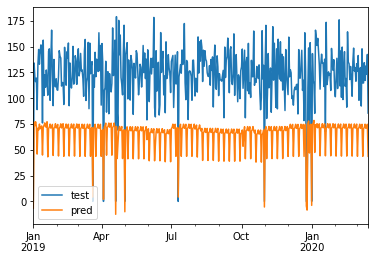

In [1365]:
pd.DataFrame({'test':test_new_2['01.01.2019':'15.03.2020']['Vollkornbrot'],'pred':pred_new_2_2.predicted_mean['01.01.2019':'15.03.2020']}).plot();plt.show()

#### Brötchen

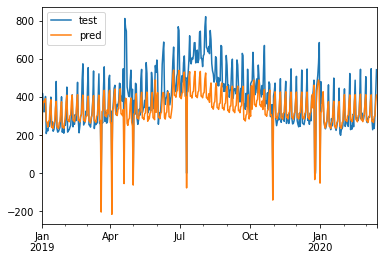

In [1366]:
pd.DataFrame({'test':test_basis_2['01.01.2019':'15.03.2020']['Brötchen'],'pred':pred_new_2_6.predicted_mean['01.01.2019':'15.03.2020']}).plot();plt.show()

#### Stückgebäck

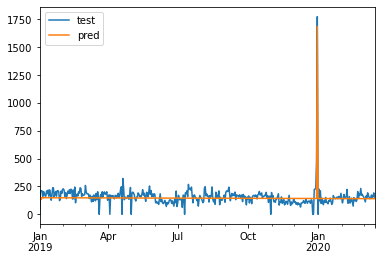

In [1326]:
pd.DataFrame({'test':test_new_2['01.01.2019':'15.03.2020']['Stückgebäck'],'pred':pred_new_2_10.predicted_mean['01.01.2019':'15.03.2020']}).plot();plt.show()

#### Weihnachtsartikel

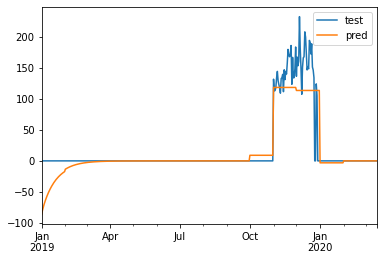

In [1327]:
pd.DataFrame({'test':test_new_2['01.01.2019':'15.03.2020']['Weihnachtsartikel'],'pred':pred_new_2_12.predicted_mean['01.01.2019':'15.03.2020']}).plot();plt.show()

### Diagnostics

#### Diagnostics for Vollkornbrot

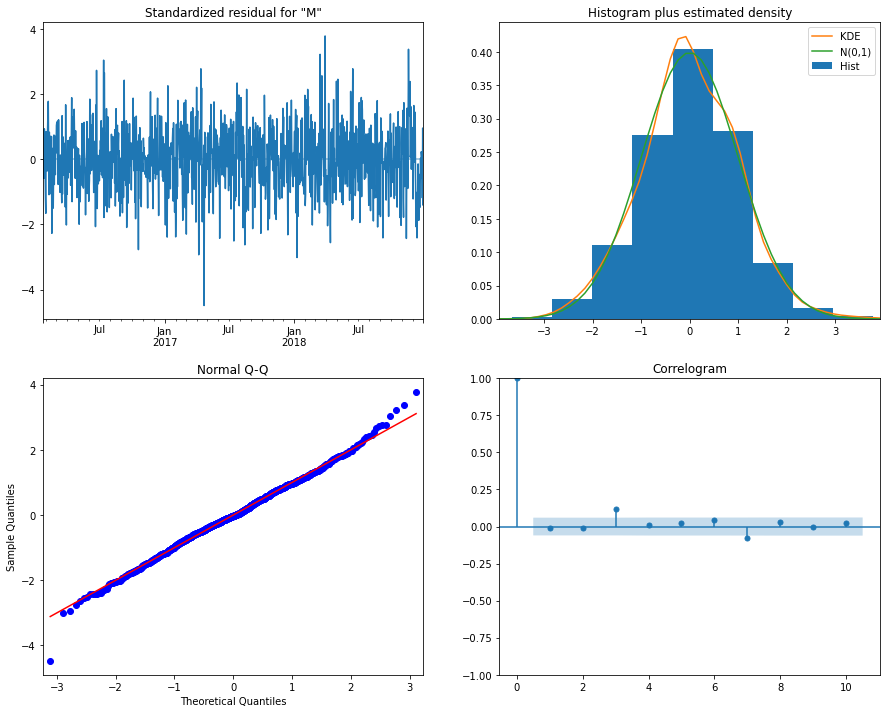

In [1329]:
sarimax_new_2_2.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Diagnostics for Brötchen

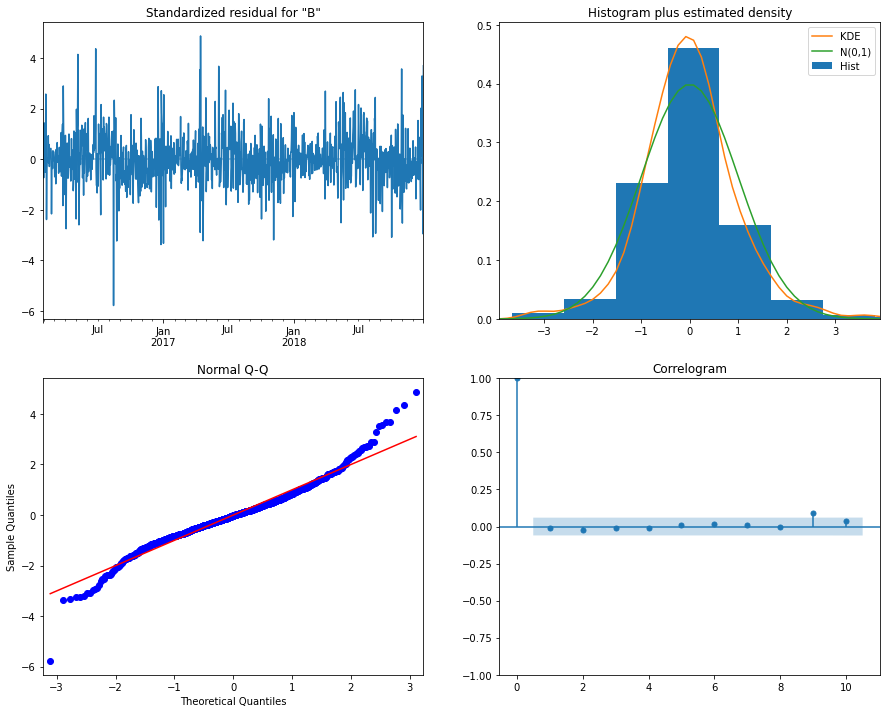

In [1330]:
sarimax_new_2_6.plot_diagnostics(figsize=(15, 12))
plt.show()

In [132]:
res_df_6_new=pd.DataFrame(sarimax_new_2_6.resid,columns=['resid'])

In [1331]:
res_df_6_new.nlargest(5,'resid')

,resid
Datum,
2016-01-08,423.454681
2016-01-22,131.593750
2016-06-25,120.905947
2017-01-08,117.212160
2016-05-06,116.693413


                        Unobserved Components Results                         
Dep. Variable:               Brötchen   No. Observations:                  440
Model:                    local level   Log Likelihood               -2715.391
Date:                Fri, 20 Nov 2020   AIC                           5434.782
Time:                        09:09:49   BIC                           5442.951
Sample:                    01-01-2019   HQIC                          5438.005
                         - 03-15-2020                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.222e+04    600.001     20.361      0.000     1.1e+04    1.34e+04
sigma2.level       174.0878     66.166      2.631      0.009      44.404     303.772
Ljung-Box (L1) (Q):         

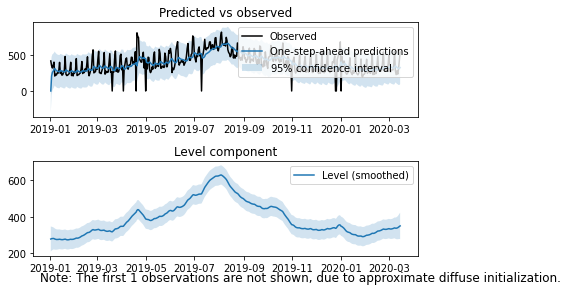

In [1918]:
#Fit a local level model
endog=test_new_2['Brötchen']
local_model = sm.tsa.UnobservedComponents(endog, 'local level')
# Fit the model via maximum likelihood
result = local_model.fit()
# result is an instance of the UnobservedComponentsResults class
print(result.summary())
# Show a plot of the estimated level and trend component series
fig = result.plot_components()
plt.tight_layout()

#### Diagnostics for Süsse Brötchen

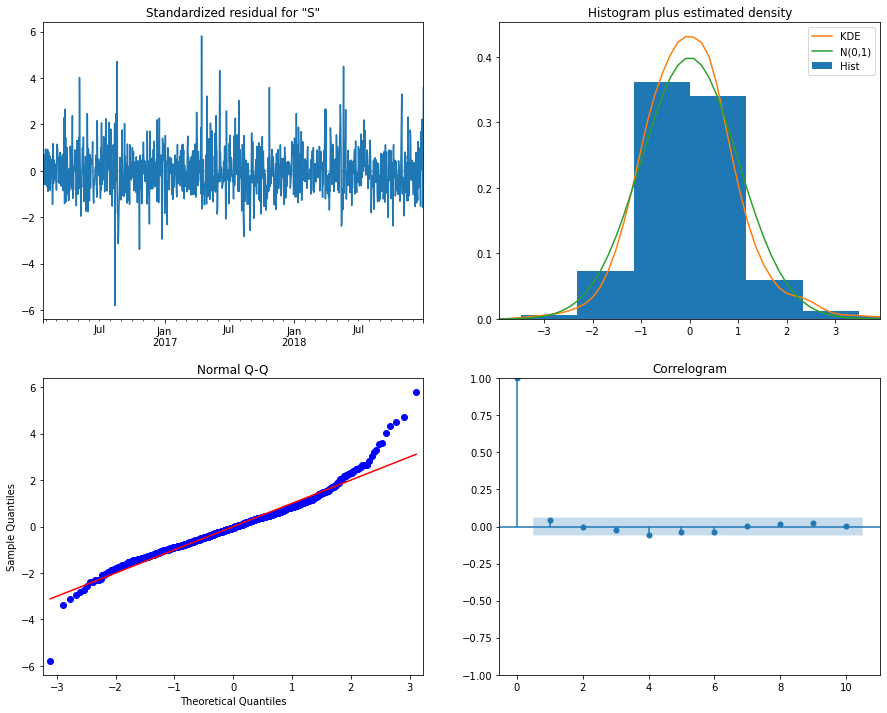

In [1332]:
sarimax_new_2_7.plot_diagnostics(figsize=(15, 12))
plt.show()

                        Unobserved Components Results                         
Dep. Variable:         Süsse_Brötchen   No. Observations:                  440
Model:                    local level   Log Likelihood               -2345.529
Date:                Fri, 20 Nov 2020   AIC                           4695.058
Time:                        09:13:08   BIC                           4703.227
Sample:                    01-01-2019   HQIC                          4698.281
                         - 03-15-2020                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  2291.3087     99.853     22.947      0.000    2095.600    2487.018
sigma2.level        26.3561     11.687      2.255      0.024       3.450      49.262
Ljung-Box (L1) (Q):         

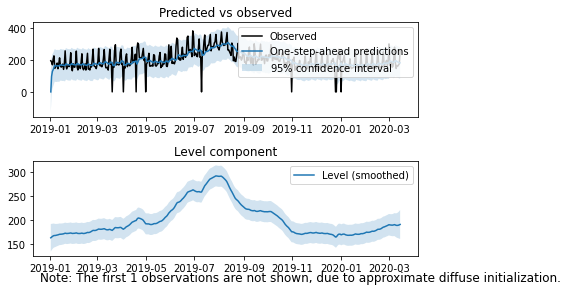

In [1919]:
#Fit a local level model
endog=test_new_2['Süsse_Brötchen']
local_model = sm.tsa.UnobservedComponents(endog, 'local level')
# Fit the model via maximum likelihood
result = local_model.fit()
# result is an instance of the UnobservedComponentsResults class
print(result.summary())
# Show a plot of the estimated level and trend component series
fig = result.plot_components()
plt.tight_layout()

#### Diagnostics for Stückgebäck

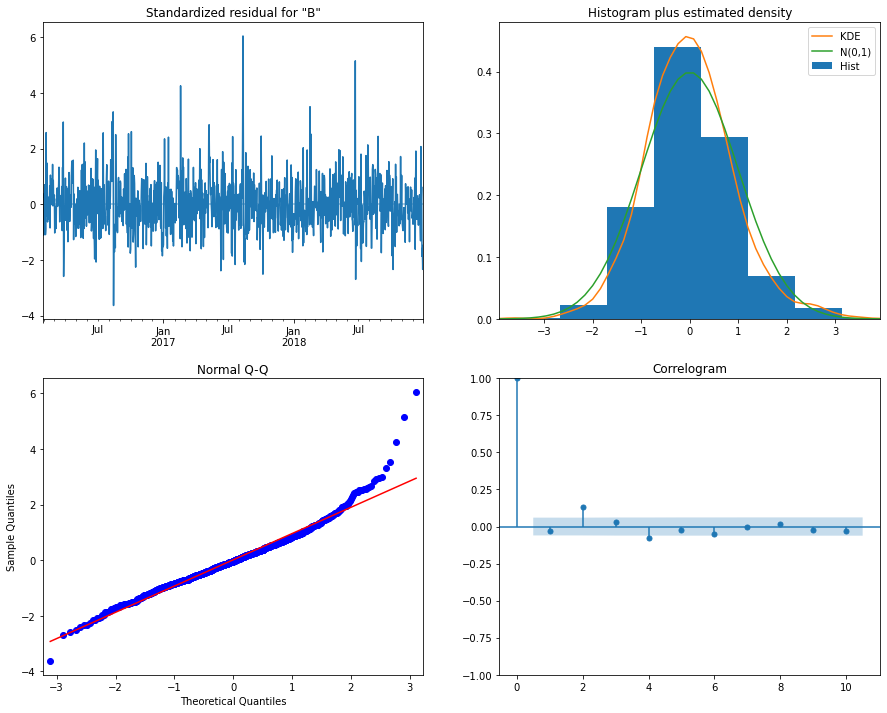

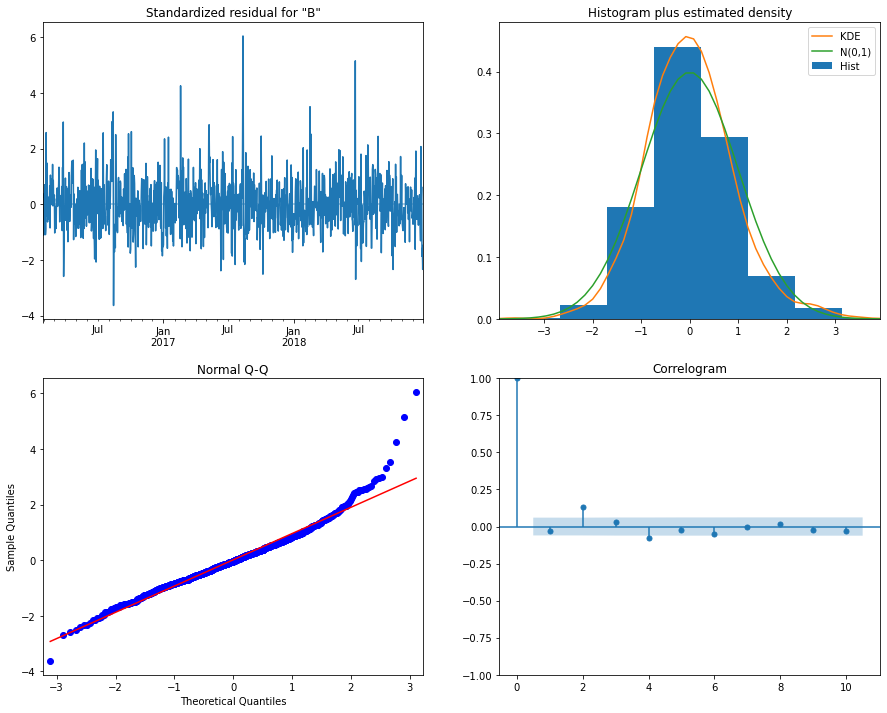

In [1333]:
sarimax_new_2_11.plot_diagnostics(figsize=(15, 12))

In [137]:
res_df_11_new=pd.DataFrame(sarimax_new_2_11.resid,columns=['resid'])

In [138]:
res_df_11_new.nlargest(5,'resid')

,resid
Datum,
2017-08-12,185.844495
2018-06-23,157.059870
2017-02-18,125.203997
2018-02-16,108.252551
2016-01-11,105.951989


#### Diagnostics for Weihnachtsartikel

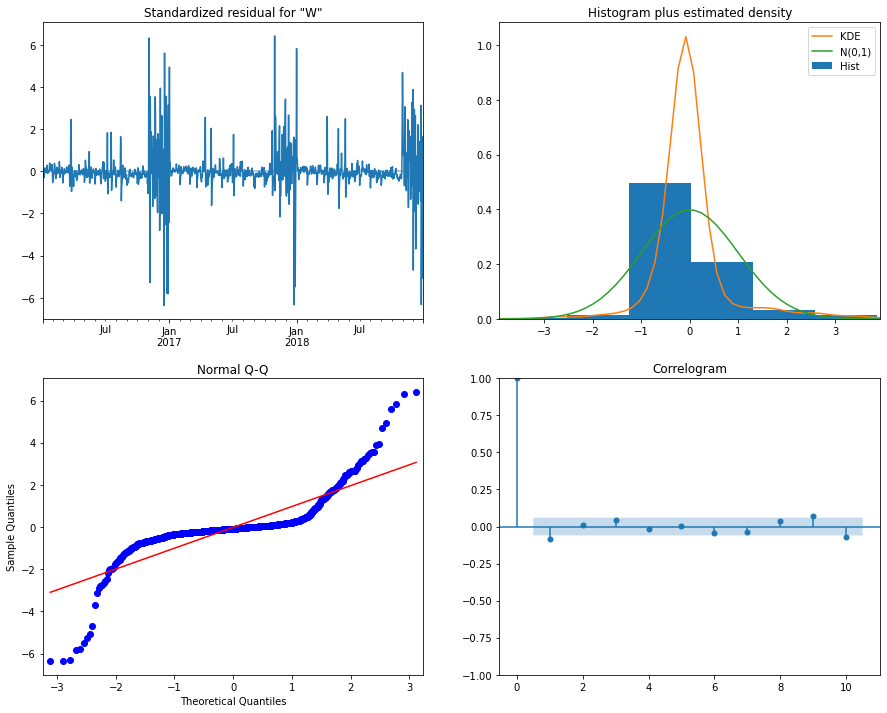

In [474]:
sarimax_new_2_12.plot_diagnostics(figsize=(15, 12))
plt.show()

# Optimazation 

## SARIMAX - New Model with Cleaned Data

In [115]:
exog_train_new_2_clean=train_new_2_clean.iloc[:,13:27]
exog_test_new_2_clean=test_new_2_clean.iloc[:,13:27]
exog_test_new_2_short=exog_test_new_2.iloc[:,np.r_[1:11,13]]
exog_train_new_2_short=exog_train_new_2.iloc[:,np.r_[1:11,13]]

## Transformation via Boxcox

In [1598]:
df_results_Sarimax_log = pd.DataFrame( 
                  columns=['Model', 'Label','MAE','MAPE'])

In [1748]:
df_results_Sarimax_log

,Model,Label,MAE,MAPE
6,SARIMAX_BOXCOX,Brötchen,60.0344,12.1798
5,SARIMAX_BOXCOX,Stangenbrote,15.3039,37.8005
4,SARIMAX_BOXCOX,Spezialbrot,11.3565,15.9489
7,SARIMAX_BOXCOX,Süsse_Brötchen,39.1728,15.24
8,SARIMX_BOXCOX,Herzhafte_Brötchen,21.5748,16.7237
9,SARIMAX_BOXCOX,KonditoreiBlech,17.414,21.648
10,SARIMA_BOXCOX,Stückgebäck,inf,22.6103
11,SARIMAX_BOXCOX,Blechkuchen,23.0705,22.7563


In [772]:
df_results_Sarimax_log.to_csv("df_results_Sarimax_transf")

**Conclusions**
- `Normalization does only makes sense if i substitute the zeros in train set. I first try normalization than boxcox.`
- `The Normalization was successful for a couple of items: Weizenbrot, Vollkornbrot, Brötchen, Herzhafte_Brötchen, KonditoreiBlech and Blechkuchen.`
- `For the other articlegroups i will try Box-Cox. `

### Fufilling preconditons for transformation / Modify Dataframe

In [1410]:
train_new_2_nozero=train_new_2.copy()

In [1411]:
for i in train_new_2_nozero.columns:
    train_new_2_nozero[i]=train_new_2_nozero[i].apply(lambda x: x if x >0 else None)
    

In [1412]:
train_new_2_nozero.fillna(method='ffill',inplace=True)

In [1413]:
train_new_2_nozero.fillna(method='bfill',inplace=True)

### Check skewness

In [1761]:
df_model_2=train_new_2_nozero.iloc[:,0:12]

In [1415]:
df_model_2.skew()

Weizenbrot             0.184213
Mischbrot              0.151269
Vollkornbrot           0.436794
Stangenbrote           1.866279
Spezialbrot            2.820665
Brötchen               0.688803
Süsse_Brötchen         1.058870
Herzhafte_Brötchen     1.204593
KonditoreiBlech        0.831828
Stückgebäck           11.746285
Blechkuchen            1.123117
Weihnachtsartikel      2.733090
dtype: float64

### Transformation via Boxcox

In [1587]:
# Apply Box-Cox Transform and save the lambda for later inverse.
train_new_2_nozero['Brötchen'], lam = stats.boxcox(train_new_2_nozero['Brötchen'])
print('Lambda is:', lam)

Lambda is: -0.1876591442608212


In [1588]:
# Apply Box-Cox Transform and save the lambda for later inverse.
train_new_2_nozero['Herzhafte_Brötchen'], lam = stats.boxcox(train_new_2_nozero['Herzhafte_Brötchen'])
print('Lambda is:', lam)

Lambda is: -0.17568570755621754


In [1589]:
# Apply Box-Cox Transform and save the lambda for later inverse.
train_new_2_nozero['Süsse_Brötchen'], lam = stats.boxcox(train_new_2_nozero['Süsse_Brötchen'])
print('Lambda is:', lam)

Lambda is: -1.2101103943444873


In [1590]:
train_new_2_nozero['Spezialbrot'], lam = stats.boxcox(train_new_2_nozero['Spezialbrot'])
print('Lambda is:', lam)

Lambda is: -0.5865626468346328


In [1757]:
train_new_2_nozero['Weizenbrot'], lam = stats.boxcox(train_new_2_nozero['Weizenbrot'])
print('Lambda is:', lam)

Lambda is: 0.7269583136141211


In [1758]:
train_new_2_nozero['Vollkornbrot'], lam = stats.boxcox(train_new_2_nozero['Vollkornbrot'])
print('Lambda is:', lam)

Lambda is: 0.29139541454762846


In [1759]:
train_new_2_nozero['Mischbrot'], lam = stats.boxcox(train_new_2_nozero['Mischbrot'])
print('Lambda is:', lam)

Lambda is: 0.8173329858535373


In [1591]:
train_new_2_nozero['Stangenbrote'], lam = stats.boxcox(train_new_2_nozero['Stangenbrote'])
print('Lambda is:', lam)

Lambda is: 0.5009173788116431


In [1592]:
# Apply Box-Cox Transform and save the lambda for later inverse.
train_new_2_nozero['Blechkuchen'], lam = stats.boxcox(train_new_2_nozero['Blechkuchen'])
print('Lambda is:', lam)

Lambda is: 0.16141094711951431


In [1593]:
# Apply Box-Cox Transform and save the lambda for later inverse.
train_new_2_nozero['KonditoreiBlech'], lam = stats.boxcox(train_new_2_nozero['KonditoreiBlech'])
print('Lambda is:', lam)

Lambda is: -0.032222931570648254


In [1594]:
train_new_2_nozero['Stückgebäck'], lam = stats.boxcox(train_new_2_nozero['Stückgebäck'])
print('Lambda is:', lam)

Lambda is: -0.7865958044831738


In [1808]:
train_new_2_nozero['Weihnachtsartikel'], lam = stats.boxcox(train_new_2_nozero['Weihnachtsartikel'])
print('Lambda is:', lam)

Lambda is: -3.9395111364583024


In [1810]:
# Look at the Skewness again after Transformation. I have not tried for Weihnachtsartikel
train_new_2_nozero.iloc[:,0:12].skew()

Weizenbrot            0.016692
Mischbrot             0.009186
Vollkornbrot          0.006276
Stangenbrote          0.194006
Spezialbrot          -0.076856
Brötchen              0.018087
Süsse_Brötchen        0.079456
Herzhafte_Brötchen   -0.004662
KonditoreiBlech       0.006340
Stückgebäck          -0.147421
Blechkuchen          -0.001192
Weihnachtsartikel     0.000000
dtype: float64

### Hyperparametertuning

In [1864]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(train_new_2_nozero['Mischbrot'], 
                        exogenous=exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]],
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=7, max_q=7, max_m=7,
                           start_P=0, seasonal=True,
                            D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7260.756, Time=2.52 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7352.067, Time=4.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7282.469, Time=4.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8505.055, Time=0.93 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=7372.028, Time=3.89 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 16.392 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1096
Model:                        SARIMAX   Log Likelihood               -3606.378
Date:                Fri, 20 Nov 2020   AIC                           7260.756
Time:                        08:23:07   BIC                           7380.742
Sample:                    01-01-2016   HQIC                          7306.156
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          40.3225      0.911     44.278      0.000      38.538      42.107
Wochenende_flag    -4.4908      0.427    -10.514      0.000      -5.328      -3.654
Closed              1.2954      1.128      1.148      0.251      -0.915       3.506
Feiertag_DE        -2.6765      1.193     -2.243      0.025      -5.015      -0.338
Holidays_SH         2.2919      0.553      4.142      0.000       1.207       3.377
Kieler_Woche        0.6023      1.751      0.344      0.731      -2.829       4.034
M_2                -0.0088      1.013     -0.009      0.993      -1.995       1.977
M_3                 0.8483      0.971      0.873      0.382      -1.055       2.752
M_4                 0.8175      0.974      0.840      0.401      -1.091       2.726
M_5                 1.3961      1.060      1.317      0.188      -0.681       3.473
M_6                 2.5189      1.155      2.181      0.029       0.255       4.783
M_7                 4.5841      0.978      4.688      0.000       2.668       6.500
M_8                 3.4134      1.082      3.156      0.002       1.293       5.533
M_9                 2.2766      1.115      2.042      0.041       0.092       4.461
M_10                0.1852      1.057      0.175      0.861      -1.887       2.257
M_11                1.3078      0.969      1.349      0.177      -0.592       3.208
M_12                1.4840      1.029      1.442      0.149      -0.534       3.502
W_1                -0.9273      0.757     -1.225      0.220      -2.411       0.556
W_2                -2.2909      0.776     -2.954      0.003      -3.811      -0.771
W_3                -0.3832      0.705     -0.544      0.587      -1.765       0.999
W_4                -2.0917      0.696     -3.005      0.003      -3.456      -0.727
W_5                 2.4017      0.450      5.334      0.000       1.519       3.284
W_6                -6.8925      0.464    -14.848      0.000      -7.802      -5.983
sigma2             42.2268      1.724     24.494      0.000      38.848      45.606
===================================================================================
Ljung-Box (L1) (Q):                  15.34   Jarque-Bera (JB):                14.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.11
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.85e+17. Standard errors may be unstable.
"""

### Weizenbrot 

In [1769]:
# Model fit
sarimax_new_2_1trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Weizenbrot'],order=(2,0,0),seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_1.summary()

In [1770]:
pred_new_2_1trans = sarimax_new_2_1trans.get_prediction(start=start_test,end=corona,
                                                    exog = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]])

In [1771]:

pred_new_2_1trans.predicted_mean=inv_boxcox(pred_new_2_1trans.predicted_mean, 0.7269583136141211)

In [1904]:
MAE_1n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Weizenbrot'],
                            pred_new_2_1trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_1n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Weizenbrot'],
                                        pred_new_2_1trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Weizenbrot:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_1n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_1n))

df_results_Sarimax_OPT.loc['1',:] = ['SARIMAX_BOXCOX','Weizenbrot',MAE_1n,MAPE_1n]

Results for Basismodel-Articlegroup Weizenbrot:
SARIMAX model MAE: 20.30
SARIMAX model MAPE: 15.38%


### Mischbrot

In [1801]:
# Model fit
sarimax_new_2_2trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Mischbrot'],order=(3,0,0),
                                                 seasonal_order=(2,1,0,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()


In [1802]:
pred_new_2_2trans = sarimax_new_2_2trans.get_prediction(start=start_test,end=corona,
                                                        exog = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]])

In [1803]:
pred_new_2_2trans.predicted_mean=inv_boxcox(pred_new_2_2trans.predicted_mean, 0.8173329858535373)

In [1903]:
MAE_2n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Mischbrot'],
                            pred_new_2_2trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_2n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Mischbrot'],
                                        pred_new_2_2trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Mischbrot:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_2n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_2n))

df_results_Sarimax_OPT.loc['2',:] = ['SARIMAX_BOXCOX','Mischbrot',MAE_2n,MAPE_2n]

Results for Basismodel-Articlegroup Mischbrot:
SARIMAX model MAE: 16.81
SARIMAX model MAPE: 19.74%


### Vollkornbrot

In [1774]:
# Model fit
sarimax_new_2_3trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Vollkornbrot'],order=(0,1,1),seasonal_order=(0,0,1,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]],
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_3.summary()

In [1777]:
pred_new_2_3trans = sarimax_new_2_3trans.get_prediction(start=start_test,end=corona,
                                                        exog = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,12:29]])

In [1778]:
pred_new_2_3trans.predicted_mean=inv_boxcox(pred_new_2_3trans.predicted_mean, 0.29139541454762846)

In [1902]:
MAE_3n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Vollkornbrot'],
                            pred_new_2_3trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_3n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Vollkornbrot'],
                                        pred_new_2_3trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Vollkornbrot:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_3n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_3n))

df_results_Sarimax_OPT.loc['3',:] = ['SARIMAX_BOXCOX','Vollkornbrot',MAE_3n,MAPE_3n]

Results for Basismodel-Articlegroup Vollkornbrot:
SARIMAX model MAE: 18.26
SARIMAX model MAPE: 12.55%


### Spezialbrot

In [1623]:
# Model fit
sarimax_new_2_4trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Spezialbrot'],order=(1,0,1),
                                           seasonal_order=(2, 1, 1, 7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,23:29]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_4.summary()

In [1617]:
pred_new_2_4trans = sarimax_new_2_4trans.get_prediction(start=start_test,end=corona,
                                                        exog = exog_test_dum_2.iloc[:,np.r_[0,23:29]])

In [1618]:
pred_new_2_4trans.predicted_mean=inv_boxcox(pred_new_2_4trans.predicted_mean, -0.5865626468346328)

In [1901]:
MAE_4n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Spezialbrot'],pred_new_2_4trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_4n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Spezialbrot'],
                                        pred_new_2_4trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Spezialbrot:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_4n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_4n))

df_results_Sarimax_OPT.loc['4',:] = ['SARIMAX_BOXCOX','Spezialbrot',MAE_4n,MAPE_4n]

Results for Basismodel-Articlegroup Spezialbrot:
SARIMAX model MAE: 11.36
SARIMAX model MAPE: 15.95%


### Stangenbrote

In [1628]:
# Model fit
sarimax_new_2_5trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Stangenbrote'],order=(2,0,0),
                                            seasonal_order=((1, 0, 1, 7)),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,12:29]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_5.summary()

In [1629]:
pred_new_2_5trans = sarimax_new_2_5trans.get_prediction(start=start_test,end=corona,exog = exog_test_dum_2.iloc[:,np.r_[0,12:29]])

In [1630]:
pred_new_2_5trans.predicted_mean=inv_boxcox(pred_new_2_5trans.predicted_mean, 0.5009173788116431)

In [1631]:
MAE_5n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Stangenbrote'],pred_new_2_5trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_5n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Stangenbrote'],
                                        pred_new_2_5trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Stangenbrote:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_5n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_5n))

df_results_Sarimax_log.loc['5',:] = ['SARIMAX_BOXCOX','Stangenbrote',MAE_5n,MAPE_5n]

Results for Basismodel-Articlegroup Stangenbrote:
SARIMAX model MAE: 15.30
SARIMAX model MAPE: 37.80%


### Brötchen

In [1600]:
# Model fit
sarimax_new_2_6trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Brötchen'],order=(1,0,6),seasonal_order=(0,1,2,7),
                                             exog=exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]],
                                            enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()


In [1603]:
pred_new_2_6trans = sarimax_new_2_6trans.get_prediction(start=start_test,end=corona,
                                                        exog=exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]])

In [1604]:
pred_new_2_6trans.predicted_mean=inv_boxcox(pred_new_2_6trans.predicted_mean, -0.1876591442608212)

In [1605]:
MAE_6n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Brötchen'],pred_new_2_6trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_6n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Brötchen'],
                                        pred_new_2_6trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_6n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_6n))

df_results_Sarimax_log.loc['6',:] = ['SARIMAX_BOXCOX','Brötchen',MAE_6n,MAPE_6n]

Results for Basismodel-Articlegroup Brötchen:
SARIMAX model MAE: 60.03
SARIMAX model MAPE: 12.18%


### Süsse Brötchen

In [1641]:
# Model fit
sarimax_new_2_7trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Süsse_Brötchen'],
                                                 order=(0,0,2),seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]],
                                                 enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_7.summary()

In [1642]:
pred_new_2_7trans = sarimax_new_2_7trans.get_prediction(start=start_test,end=corona,
                                                  exog = exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]])

In [1643]:
pred_new_2_7trans.predicted_mean=inv_boxcox(pred_new_2_7trans.predicted_mean, -1.2101103943444873)

In [1644]:
MAE_7n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],pred_new_2_7trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_7n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],
                                        pred_new_2_7trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Süsse_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_7n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_7n))

df_results_Sarimax_log.loc['7',:] = ['SARIMAX_BOXCOX','Süsse_Brötchen',MAE_7n,MAPE_7n]

Results for Basismodel-Articlegroup Süsse_Brötchen:
SARIMAX model MAE: 39.17
SARIMAX model MAPE: 15.24%


### Herzhafte Brötchen

In [1652]:
# Model fit
sarimax_new_2_8trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Herzhafte_Brötchen'],
                                                 order=(2,0,2),seasonal_order=(1,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:38]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_8.summary()

In [1649]:
pred_new_2_8trans = sarimax_new_2_8trans.get_prediction(start=start_test,end=corona,
                                                    exog = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:38]])

In [1650]:
pred_new_2_8trans.predicted_mean=inv_boxcox(pred_new_2_8trans.predicted_mean,-0.17568570755621754) 

In [1651]:
MAE_8n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],pred_new_2_8trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_8n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],
                                        pred_new_2_8trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Herzhafte_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_8n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_8n))

df_results_Sarimax_log.loc['8',:] = ['SARIMX_BOXCOX','Herzhafte_Brötchen',MAE_8n,MAPE_8n]

Results for Basismodel-Articlegroup Herzhafte_Brötchen:
SARIMAX model MAE: 21.57
SARIMAX model MAPE: 16.72%


### KonditoreiBlech

In [1672]:
# Model fit
sarimax_new_2_9trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['KonditoreiBlech'],
                                                 order=(3,0,1),
                                                 seasonal_order=(1,1,1,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[12,28,37]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_9.summary()

In [1673]:
pred_new_2_9trans = sarimax_new_2_9trans.get_prediction(start=start_test,end=corona,
                                                    exog = exog_test_dum_2.iloc[:,np.r_[12,28,37]])

In [1674]:
pred_new_2_9trans.predicted_mean=inv_boxcox(pred_new_2_9trans.predicted_mean,-0.032222931570648254)

In [1900]:
MAE_9n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['KonditoreiBlech'],
                            pred_new_2_9trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_9n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['KonditoreiBlech'],
                                        pred_new_2_9trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup KonditoreiBlech:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_9n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_9n))

df_results_Sarimax_OPT.loc['9',:] = ['SARIMAX_BOXCOX','KonditoreiBlech',MAE_9n,MAPE_9n]

Results for Basismodel-Articlegroup KonditoreiBlech:
SARIMAX model MAE: 17.41
SARIMAX model MAPE: 21.65%


### Stückgebäck

In [1695]:
# Model fit
sarimax_new_2_10trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Stückgebäck'],order=(3,0,3),
                                             #seasonal_order=(2,0,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[10]],
                                             enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_10.summary()

In [1696]:
pred_new_2_10trans = sarimax_new_2_10trans.get_prediction(start=start_test,end=corona,
                                                    exog = exog_test_dum_2.iloc[:,np.r_[10]])

In [1697]:
pred_new_2_10trans.predicted_mean=inv_boxcox(pred_new_2_10trans.predicted_mean,-0.7865958044831738)

In [1899]:
MAE_10n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Stückgebäck'],
                            pred_new_2_10trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_10n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Stückgebäck'],
                                       pred_new_2_10trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Stückgebäck:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_10n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_10n))

df_results_Sarimax_OPT.loc['10',:] = ['SARIMA_BOXCOX','Stückgebäck','inf',MAPE_10n]

Results for Basismodel-Articlegroup Stückgebäck:
SARIMAX model MAE: 42.45
SARIMAX model MAPE: 22.61%


### Blechkuchen

In [1909]:
#Model fit
sarimax_new_2_11trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Blechkuchen'],order=(3,0,6),
                                                  seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:22,28,34:38]],
                                        enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_11.summary()

In [1911]:
pred_new_2_11trans = sarimax_new_2_11trans.get_prediction(start=start_test,end=corona,
                                                          exog = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:22,28,34:38]])

In [1912]:
pred_new_2_11trans.predicted_mean=inv_boxcox(pred_new_2_11trans.predicted_mean,0.16141094711951431)

In [1913]:
MAE_11n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Blechkuchen'],
                            pred_new_2_11trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_11n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Blechkuchen'],
                                        pred_new_2_11trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Blechkuchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_11n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_11n))

df_results_Sarimax_OPT.loc['11',:] = ['SARIMAX_BOXCOX','Blechkuchen',MAE_11n,MAPE_11n]

Results for Basismodel-Articlegroup Blechkuchen:
SARIMAX model MAE: 23.07
SARIMAX model MAPE: 22.76%


### Weihnachtsartikel

In [1829]:
# Model fit
sarimax_new_2_12trans = sm.tsa.statespace.SARIMAX(train_new_2['Weihnachtsartikel'],order=(0,1,0),
                                             #seasonal_order=(2,0,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[10,22]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_12.summary()

In [1830]:
pred_new_2_12trans = sarimax_new_2_12trans.get_prediction(start=start_test,end=corona,
                                                          exog = exog_test_dum_2.iloc[:,np.r_[10,22]])

In [1831]:
pred_new_2_12trans.predicted_mean=inv_boxcox(pred_new_2_12trans.predicted_mean,-3.9395111364583024)

In [1832]:
MAE_12n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Weihnachtsartikel'],
                            pred_new_2_12trans.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_12n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Blechkuchen'],
                                        pred_new_2_12trans.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Weihnachtsartikel:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_12n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_12n))

df_results_Sarimax_log.loc['12',:] = ['SARIMAX_BOXCOX','Weihnachtsartikel',MAE_12n,MAPE_12n]

Results for Basismodel-Articlegroup Weihnachtsartikel:
SARIMAX model MAE: 19.41
SARIMAX model MAPE: 99.49%


## Trick via Addition von res.mean

### Brötchen

In [1833]:
res_df_6_trans=pd.DataFrame(sarimax_new_2_6trans.resid,columns=['resid'])

In [1834]:
res_df_6_trans.describe()

,resid
count,1096.000000
mean,0.017156
std,0.230100
min,-0.971362
25%,-0.024946
50%,0.000372
75%,0.024803
max,3.573496


In [1838]:
# Model fit
sarimax_new_2_6trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Brötchen'],order=(1,0,6),seasonal_order=(0,1,2,7),
                                             exog=exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]],
                                            enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()


In [1840]:
pred_new_2_6trans = sarimax_new_2_6trans.get_prediction(start=start_test,end=corona,
                                    exog=exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]])

In [1841]:
pred_new_2_6trans.predicted_mean=inv_boxcox(pred_new_2_6trans.predicted_mean, -0.1876591442608212)

In [1898]:
MAE_6n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Brötchen'],
                            pred_new_2_6trans.predicted_mean['01.01.2019':'15.03.2020']-0.017156))
MAPE_6n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Brötchen'],
                                        pred_new_2_6trans.predicted_mean['01.01.2019':'15.03.2020']-0.017156))

print('Results for Basismodel-Articlegroup Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_6n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_6n))

df_results_Sarimax_OPT.loc['6',:] = ['SARIMAX-TRICK','Brötchen',MAE_6n,MAPE_6n]

Results for Basismodel-Articlegroup Brötchen:
SARIMAX model MAE: 60.04
SARIMAX model MAPE: 12.18%


### Süsse Brötchen

In [1845]:
res_df_7_new=pd.DataFrame(sarimax_new_2_7.resid,columns=['resid'])

In [1846]:
res_df_7_new.describe()

,resid
count,1096.000000
mean,0.150102
std,21.986847
min,-141.682615
25%,-13.038962
50%,-0.430879
75%,11.022990
max,156.599003


In [1641]:
# Model fit
sarimax_new_2_7new = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Süsse_Brötchen'],
                                                 order=(0,0,2),seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]],
                                                 enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_7.summary()

In [1642]:
pred_new_2_7new = sarimax_new_2_7new.get_prediction(start=start_test,end=corona,
                                                  exog = exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]])

In [1897]:
MAE_7n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],
                            pred_new_2_7.predicted_mean['01.01.2019':'15.03.2020']-0.150102))
MAPE_7n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],
                                        pred_new_2_7.predicted_mean['01.01.2019':'15.03.2020']-0.150102))

print('Results for Basismodel-Articlegroup Süsse_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_7n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_7n))

df_results_Sarimax_OPT.loc['7',:] = ['SARIMAX-TRICK','Süsse_Brötchen',MAE_7n,MAPE_7n]

Results for Basismodel-Articlegroup Süsse_Brötchen:
SARIMAX model MAE: 28.11
SARIMAX model MAPE: 12.40%


### Herzhafte Brötchen

In [1852]:
res_df_8_trans=pd.DataFrame(sarimax_new_2_8trans.resid,columns=['resid'])

In [1853]:
res_df_8_trans.describe()

,resid
count,1096.000000
mean,0.027936
std,0.259864
min,-0.482827
25%,-0.048773
50%,0.015295
75%,0.072445
max,3.610829


In [ ]:
# Model fit
sarimax_new_2_8trans = sm.tsa.statespace.SARIMAX(train_new_2_nozero['Herzhafte_Brötchen'],
                                                 order=(2,0,2),seasonal_order=(1,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:38]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_8.summary()

In [ ]:
pred_new_2_8trans = sarimax_new_2_8trans.get_prediction(start=start_test,end=corona,
                                                    exog = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:38]])

In [ ]:
pred_new_2_8trans.predicted_mean=inv_boxcox(pred_new_2_8trans.predicted_mean,-0.17568570755621754) 

In [1896]:
MAE_8n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],
                            pred_new_2_8trans.predicted_mean['01.01.2019':'15.03.2020']-0.027936))
MAPE_8n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],
                                        pred_new_2_8trans.predicted_mean['01.01.2019':'15.03.2020']-0.027936))

print('Results for Basismodel-Articlegroup Herzhafte_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_8n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_8n))

df_results_Sarimax_OPT.loc['8',:] = ['SARIMAX-TRICK','Herzhafte_Brötchen',MAE_8n,MAPE_8n]

Results for Basismodel-Articlegroup Herzhafte_Brötchen:
SARIMAX model MAE: 21.59
SARIMAX model MAPE: 16.73%


## Adding a Prediction for the store value or a shift-value as Prediction

**Conclusions**
- `To double check if a precise prediction of the stores sales amount i enter the actual value to the data set.`
- `All values increases. The biggest impact can be seen by Brötchen, which was my suggestion due to the shown correlations.`
- `A additional shift_7 value has no positive impact.`


### Actual value as Prediction

#### Brötchen

In [1724]:
# Model fit
sarimax_new_2_6 = sm.tsa.statespace.SARIMAX(train_dum_2['Brötchen'],order=(1,0,6),seasonal_order=(0,1,2,7),
                                             exog=exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:39]],
                                            enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_6.summary()

In [1725]:
pred_new_2_6 = sarimax_new_2_6.get_prediction(start=start_test,end=corona,
                                              exog=exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:39]])

In [1726]:
MAE_6n=(mean_absolute_error(test_dum_2['01.01.2019':'15.03.2020']['Brötchen'],
                            pred_new_2_6.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_6n=(mean_absolute_percentage_error(test_dum_2['01.01.2019':'15.03.2020']['Brötchen'],
                                        pred_new_2_6.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_6n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_6n))

df_results_Sarimax_CF.loc['13',:] = ['SARIMAX-CF-GESPRED','Brötchen',MAE_6n,MAPE_6n]

Results for Basismodel-Articlegroup Brötchen:
SARIMAX model MAE: 27.15
SARIMAX model MAPE: 6.69%


#### Süsse Brötchen

In [1727]:
# Model fit
sarimax_new_2_7 = sm.tsa.statespace.SARIMAX(train_new_2['Süsse_Brötchen'],order=(1,0,1),seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:39]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_7.summary()

In [1728]:
pred_new_2_7 = sarimax_new_2_7.get_prediction(start=start_test,end=corona,exog = 
                                              exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:39]])

In [1746]:
MAE_7n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],pred_new_2_7.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_7n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],pred_new_2_7.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Süsse_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_7n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_7n))

df_results_Sarimax_CF.loc['14',:] = ['SARIMAX-CF-GESPRED','SüsseBrötchen',MAE_7n,MAPE_7n]

Results for Basismodel-Articlegroup Süsse_Brötchen:
SARIMAX model MAE: 28.07
SARIMAX model MAPE: 12.38%


#### Herzhafte Brötchen

In [1730]:
# Model fit
sarimax_new_2_8 = sm.tsa.statespace.SARIMAX(train_new_2['Herzhafte_Brötchen'],order=(0,0,5),seasonal_order=(2,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:39]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_8.summary()

In [1731]:
pred_new_2_8 = sarimax_new_2_8.get_prediction(start=start_test,end=corona,exog 
                                              = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:39]])

In [1747]:
MAE_8n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],pred_new_2_8.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_8n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],pred_new_2_8.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Herzhafte_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_8n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_8n))

df_results_Sarimax_CF.loc['15',:] = ['SARIMAX-CF-GESPRED','Herzhafte_Brötchen',MAE_8n,MAPE_8n]

Results for Basismodel-Articlegroup Herzhafte_Brötchen:
SARIMAX model MAE: 21.69
SARIMAX model MAPE: 18.20%


### Shift_7 as Prediction

#### Brötchen

In [1733]:
# Model fit
sarimax_new_2_6 = sm.tsa.statespace.SARIMAX(train_dum_2['Brötchen'],order=(1,0,6),seasonal_order=(0,1,2,7),
                                             exog=exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38,39]],
                                            enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_6.summary()

In [1734]:
pred_new_2_6 = sarimax_new_2_6.get_prediction(start=start_test,end=corona,
                                              exog=exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38,39]])

In [1735]:
MAE_6n=(mean_absolute_error(test_dum_2['01.01.2019':'15.03.2020']['Brötchen'],
                            pred_new_2_6.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_6n=(mean_absolute_percentage_error(test_dum_2['01.01.2019':'15.03.2020']['Brötchen'],
                                        pred_new_2_6.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_6n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_6n))

df_results_Sarimax_CF.loc['16',:] = ['SARIMAX-CF-SHIFT_7','Brötchen',MAE_6n,MAPE_6n]

Results for Basismodel-Articlegroup Brötchen:
SARIMAX model MAE: 63.02
SARIMAX model MAPE: 14.14%


#### Süsse Brötchen

In [1736]:
# Model fit
sarimax_new_2_7 = sm.tsa.statespace.SARIMAX(train_new_2['Süsse_Brötchen'],order=(1,0,1),seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38,39]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_7.summary()

In [1737]:
pred_new_2_7 = sarimax_new_2_7.get_prediction(start=start_test,end=corona,exog = 
                                              exog_test_dum_2.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38,39]])

In [1738]:
MAE_7n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],pred_new_2_7.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_7n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],pred_new_2_7.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Süsse_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_7n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_7n))

df_results_Sarimax_CF.loc['17',:] = ['SARIMAX-CF-SHIFT_7','SüsseBrötchen',MAE_7n,MAPE_7n]

Results for Basismodel-Articlegroup Süsse_Brötchen:
SARIMAX model MAE: 28.07
SARIMAX model MAPE: 12.38%


#### Herzhafte Brötchen

In [1739]:
# Model fit
sarimax_new_2_8 = sm.tsa.statespace.SARIMAX(train_new_2['Herzhafte_Brötchen'],order=(0,0,5),seasonal_order=(2,1,2,7),
                                             exog = exog_train_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:38,39]],enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_8.summary()

In [1740]:
pred_new_2_8 = sarimax_new_2_8.get_prediction(start=start_test,end=corona,exog 
                                              = exog_test_dum_2.iloc[:,np.r_[0,1,3,4,5,8,12:29,34:38,39]])

In [1741]:
MAE_8n=(mean_absolute_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],pred_new_2_8.predicted_mean['01.01.2019':'15.03.2020']))
MAPE_8n=(mean_absolute_percentage_error(test_new_2['01.01.2019':'15.03.2020']['Herzhafte_Brötchen'],pred_new_2_8.predicted_mean['01.01.2019':'15.03.2020']))

print('Results for Basismodel-Articlegroup Herzhafte_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_8n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_8n))

df_results_Sarimax_CF.loc['18',:] = ['SARIMAX-CF-SHIFT_7','Herzhafte_Brötchen',MAE_8n,MAPE_8n]

Results for Basismodel-Articlegroup Herzhafte_Brötchen:
SARIMAX model MAE: 21.69
SARIMAX model MAPE: 18.20%


# Validation via shorter / different Timeperiod

In [1875]:
start_test_short

'01.01.2020'

In [1870]:
train_short_2 = df_newmodel_2_dum[start_short:end_short]
test_short_2 = df_newmodel_2_dum[start_test_short:corona]


In [1871]:
exog_train_dum_2_short=train_short_2.iloc[:,np.r_[14:52,13,52]].copy()
exog_test_dum_2_short=test_short_2.iloc[:,np.r_[14:52,13,52]].copy()


## Brötchen

In [1872]:
# Model fit
sarimax_new_2_6short = sm.tsa.statespace.SARIMAX(train_short_2['Brötchen'],order=(1,0,6),seasonal_order=(0,1,2,7),
                                             exog=exog_train_dum_2_short.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]],
                                            enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()


In [1876]:
pred_new_2_6short = sarimax_new_2_6short.get_prediction(start=start_test_short,end=corona,
                                    exog=exog_test_dum_2_short.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]])

In [1879]:
MAE_6n=(mean_absolute_error(test_short_2['01.01.2020':'15.03.2020']['Brötchen'],
                            pred_new_2_6short.predicted_mean['01.01.2020':'15.03.2020']))
MAPE_6n=(mean_absolute_percentage_error(test_short_2['01.01.2020':'15.03.2020']['Brötchen'],
                                        pred_new_2_6short.predicted_mean['01.01.2020':'15.03.2020']))

print('Results for Basismodel-Articlegroup Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_6n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_6n))

df_results_Sarimax_OPT.loc['6',:] = ['SARIMAX-TRICK','Brötchen',MAE_6n,MAPE_6n]

Results for Basismodel-Articlegroup Brötchen:
SARIMAX model MAE: 49.70
SARIMAX model MAPE: 17.12%


## Süsse Brötchen

In [1881]:
# Model fit
sarimax_new_2_7short = sm.tsa.statespace.SARIMAX(train_short_2['Süsse_Brötchen'],
                                                 order=(0,0,2),seasonal_order=(0,1,2,7),
                                             exog = exog_train_dum_2_short.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]],
                                                 enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
#sarimax_new_2_7.summary()

In [1883]:
pred_new_2_7short = sarimax_new_2_7short.get_prediction(start=start_test_short,end=corona,
                                                  exog = exog_test_dum_2_short.iloc[:,np.r_[0,1,2,3,4,5,8,12:29,34:38]])

In [1884]:
MAE_7n=(mean_absolute_error(test_short_2['01.01.2019':'15.03.2020']['Süsse_Brötchen'],
                            pred_new_2_7short.predicted_mean['01.01.2020':'15.03.2020']))
MAPE_7n=(mean_absolute_percentage_error(test_short_2['01.01.2020':'15.03.2020']['Süsse_Brötchen'],
                                        pred_new_2_7short.predicted_mean['01.01.2020':'15.03.2020']))

print('Results for Basismodel-Articlegroup Süsse_Brötchen:')
print('SARIMAX model MAE: {0:.2f}'.format(MAE_7n))
print('SARIMAX model MAPE: {0:.2f}%'.format(MAPE_7n))


Results for Basismodel-Articlegroup Süsse_Brötchen:
SARIMAX model MAE: 17.70
SARIMAX model MAPE: 9.88%


# Overview results

In [1895]:
df_results_Sarimax_OPT = pd.DataFrame( 
                  columns=['Model', 'Label','MAE','MAPE'])

In [1914]:
df_results_Sarimax_OPT

,Model,Label,MAE,MAPE
8,SARIMAX-TRICK,Herzhafte_Brötchen,21.5862,16.7311
7,SARIMAX-TRICK,Süsse_Brötchen,28.1127,12.3963
6,SARIMAX-TRICK,Brötchen,60.0377,12.1799
10,SARIMA_BOXCOX,Stückgebäck,inf,22.6103
9,SARIMAX_BOXCOX,KonditoreiBlech,17.414,21.648
4,SARIMAX_BOXCOX,Spezialbrot,11.3565,15.9489
3,SARIMAX_BOXCOX,Vollkornbrot,18.2642,12.5524
2,SARIMAX_BOXCOX,Mischbrot,16.8139,19.7369
1,SARIMAX_BOXCOX,Weizenbrot,20.2963,15.3819
12,SARIMAX-CF,Weihnachtsartikel,132.892,14.6465
